Objective of the project is to check the impact of the vaccinations on the new covid -19 cases emerging, and look at the various variables that could possibly be the facotors for determing the new cases arising and also do time series analysis on the no of new cases using ARIMA, linear regression and Prophet

Data set:- https://ourworldindata.org/coronavirus

# Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv(r"G:\My Drive\Data Science\projects\term 2 MSE project\owid_covid_dataset.csv")

In [108]:
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,19.0,597.0,10.0,NaN,NaN
1,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,19.0,597.0,10.0,NaN,NaN
2,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,19.0,597.0,10.0,NaN,NaN
3,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,19.0,597.0,10.0,NaN,NaN
4,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,19.0,597.0,10.0,NaN,NaN


In [272]:
df.tail()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
207068,Africa,Zimbabwe,2022-03-08,256423.0,20.0,5579.0,1.0,0.0,0.0,0.0,0.0,0.0,15993524.0,20.0,308.0,2.0,2.0,31.0,250844.0,19.0
207069,Africa,Zimbabwe,2022-04-08,256444.0,21.0,5581.0,2.0,0.0,0.0,0.0,0.0,0.0,15993524.0,20.0,308.0,2.0,2.0,31.0,250863.0,19.0
207070,Africa,Zimbabwe,2022-05-08,256444.0,0.0,5581.0,0.0,0.0,0.0,0.0,0.0,0.0,15993524.0,20.0,308.0,2.0,2.0,31.0,250863.0,0.0
207071,Africa,Zimbabwe,2022-06-08,256444.0,0.0,5581.0,0.0,0.0,0.0,0.0,0.0,0.0,15993524.0,20.0,308.0,2.0,2.0,31.0,250863.0,0.0
207072,Africa,Zimbabwe,2022-07-08,256447.0,3.0,5584.0,3.0,0.0,0.0,0.0,0.0,0.0,15993524.0,20.0,308.0,2.0,2.0,31.0,250863.0,0.0


# Basic EDA - Exploring & Cleaning Data 

In [109]:
df.shape

(207073, 18)

There are 207073 rows which consists of daily COVID-19 details of all the countries all around the globe

In [110]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
count,1.987000e+05,1.983710e+05,1.799220e+05,179858.000000,27347.000000,5.730400e+04,5.466200e+04,5.218500e+04,2.894300e+04,2.058430e+05,170749.000000,170324.000000,178774.000000,128830.000000,127065.000000
mean,3.826156e+06,1.257973e+04,6.911394e+04,148.066580,859.096427,2.588919e+08,1.224694e+08,1.041915e+08,4.927860e+07,1.432171e+08,30.651389,260.943925,8.363934,10.675930,32.856034
std,2.401727e+07,8.728156e+04,3.580900e+05,760.728076,2501.547973,1.080836e+09,5.100917e+08,4.488695e+08,2.043986e+08,6.961363e+08,9.055787,119.918508,4.774870,10.585679,13.500183
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.700000e+01,15.000000,79.000000,1.000000,0.000000,8.000000
25%,3.413000e+03,0.000000e+00,1.030000e+02,0.000000,33.000000,9.442772e+05,5.374575e+05,4.600050e+05,5.313000e+04,8.960070e+05,22.000000,170.000000,5.000000,2.000000,22.000000
50%,4.163000e+04,6.500000e+01,1.034000e+03,1.000000,171.000000,7.810492e+06,4.313654e+06,3.859725e+06,1.686192e+06,7.494578e+06,31.000000,244.000000,7.000000,6.000000,31.000000
75%,4.477075e+05,1.013000e+03,9.101000e+03,16.000000,618.000000,5.210792e+07,2.597350e+07,2.240725e+07,1.289447e+07,3.357387e+07,39.000000,330.000000,11.000000,19.000000,41.000000
max,5.845903e+08,4.079467e+06,6.418044e+06,18191.000000,28891.000000,1.240480e+10,5.311208e+09,4.881183e+09,2.301445e+09,7.909295e+09,48.000000,724.000000,31.000000,44.000000,78.000000


The average mdeian age of all the countries is 30.63 with min median age as 15 and max median age as 48.2


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207073 entries, 0 to 207072
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   continent                195102 non-null  object 
 1   location                 207073 non-null  object 
 2   date                     207073 non-null  object 
 3   total_cases              198700 non-null  float64
 4   new_cases                198371 non-null  float64
 5   total_deaths             179922 non-null  float64
 6   new_deaths               179858 non-null  float64
 7   icu_patients             27347 non-null   float64
 8   total_vaccinations       57304 non-null   float64
 9   people_vaccinated_1dose  54662 non-null   float64
 10  people_fully_vaccinated  52185 non-null   float64
 11  total_boosters           28943 non-null   float64
 12  population               205843 non-null  float64
 13  median_age               170749 non-null  float64
 14  card

In [112]:
#Converting the date variable from "object" datatype to "datetime" datatype
df['date']=pd.to_datetime(df['date'])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207073 entries, 0 to 207072
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   continent                195102 non-null  object        
 1   location                 207073 non-null  object        
 2   date                     207073 non-null  datetime64[ns]
 3   total_cases              198700 non-null  float64       
 4   new_cases                198371 non-null  float64       
 5   total_deaths             179922 non-null  float64       
 6   new_deaths               179858 non-null  float64       
 7   icu_patients             27347 non-null   float64       
 8   total_vaccinations       57304 non-null   float64       
 9   people_vaccinated_1dose  54662 non-null   float64       
 10  people_fully_vaccinated  52185 non-null   float64       
 11  total_boosters           28943 non-null   float64       
 12  population      

In [114]:
df.isnull().sum()

continent                   11971
location                        0
date                            0
total_cases                  8373
new_cases                    8702
total_deaths                27151
new_deaths                  27215
icu_patients               179726
total_vaccinations         149769
people_vaccinated_1dose    152411
people_fully_vaccinated    154888
total_boosters             178130
population                   1230
median_age                  36324
cardiovasc_death_rate       36749
diabetes_prevalence         28299
female_smokers              78243
male_smokers                80008
dtype: int64

There are a large no of null values in the data set. So, should be a way to sort this out.
As the data is all about the COVID-19 cases, deaths, recovery, vaccinations, etc and the data is been updated daily from the advent of this novel virus. So, we will be replacing the null values with the 0.

The null values are replaced by '0' as the data is updated daily and there were no cases/ deaths/ recovery/ vaccinations/ etc till a specific date in each and every country and so we will be replacing them with 0 rather than removing them.

In [115]:
df=df.fillna(0)
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0


In [116]:
df.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
icu_patients               0
total_vaccinations         0
people_vaccinated_1dose    0
people_fully_vaccinated    0
total_boosters             0
population                 0
median_age                 0
cardiovasc_death_rate      0
diabetes_prevalence        0
female_smokers             0
male_smokers               0
dtype: int64

As we have dealt with the null values present in data, we will look at the no of unique values present in every variable

In [117]:
df.nunique()

continent                       7
location                      244
date                          950
total_cases                107981
new_cases                   25579
total_deaths                42136
new_deaths                   4579
icu_patients                 3947
total_vaccinations          56465
people_vaccinated_1dose     53376
people_fully_vaccinated     50550
total_boosters              25048
population                    243
median_age                     35
cardiovasc_death_rate         153
diabetes_prevalence            25
female_smokers                 37
male_smokers                   53
dtype: int64

Here from the above data we can infer that the data contains the data of the 7 continents and in-specific, data of all 244 countries all around the world.

The data has been taken for 950 days since the advent of the novel virus.



In [118]:
#Inserting new variables called "total_recovered" & "new_recovered",
#which is basically the difference between  no_of_cases and no_of_deaths on that specific date. 
total_recovered=df['total_cases']-df['total_deaths']
new_recovered=df['new_cases']-df['new_deaths']
df['total_recovered']=total_recovered
df['new_recovered']=new_recovered
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0,5.0,5.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0,5.0,0.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0,5.0,0.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0,5.0,0.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40099462.0,19.0,597.0,10.0,0.0,0.0,5.0,0.0


# Data Visualizations

<AxesSubplot:xlabel='date', ylabel='new_cases'>

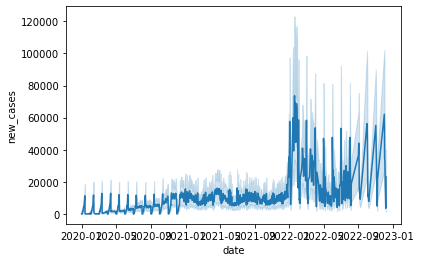

In [119]:
sns.lineplot(x='date',y='new_cases', data=df)

<AxesSubplot:xlabel='date', ylabel='new_deaths'>

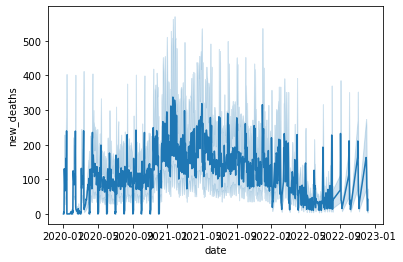

In [120]:
sns.lineplot(x='date',y='new_deaths', data=df)

<Figure size 3600x2520 with 0 Axes>

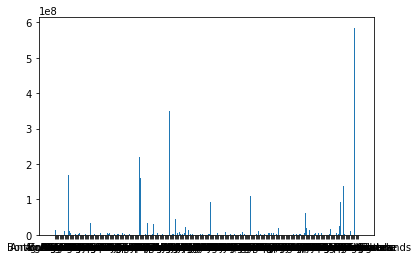

<Figure size 3600x2520 with 0 Axes>

In [121]:
plt.bar(df['location'],df['total_cases'])
plt.figure(figsize=(50,35))

# Correlation

In [122]:
df.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.733268,0.940657,0.515384,0.064578,0.836703,0.839690,0.838303,0.817239,0.612299,-0.101906,-0.118883,-0.092658,-0.028126,-0.040618,0.999988,0.732918
new_cases,0.733268,1.000000,0.731054,0.648155,0.093642,0.592769,0.601313,0.595156,0.531383,0.538869,-0.090816,-0.111922,-0.087435,-0.023355,-0.036560,0.732664,0.999980
total_deaths,0.940657,0.731054,1.000000,0.664045,0.068927,0.826117,0.847817,0.825940,0.708138,0.700262,-0.118539,-0.132811,-0.104463,-0.036563,-0.048046,0.938986,0.729448
new_deaths,0.515384,0.648155,0.664045,1.000000,0.107042,0.373552,0.406588,0.356501,0.202133,0.710176,-0.118778,-0.131803,-0.105507,-0.036177,-0.045719,0.512795,0.643293
icu_patients,0.064578,0.093642,0.068927,0.107042,1.000000,0.009463,0.011886,0.011897,0.007193,0.003209,0.119132,-0.049236,0.025107,0.176434,0.057367,0.064459,0.093252
total_vaccinations,0.836703,0.592769,0.826117,0.373552,0.009463,1.000000,0.973000,0.974745,0.849836,0.630109,-0.083286,-0.088443,-0.069814,-0.044654,-0.022733,0.836130,0.592846
people_vaccinated_1dose,0.839690,0.601313,0.847817,0.406588,0.011886,0.973000,1.000000,0.988426,0.811733,0.645210,-0.095884,-0.094207,-0.077105,-0.043317,-0.036392,0.838845,0.601160
people_fully_vaccinated,0.838303,0.595156,0.825940,0.356501,0.011897,0.974745,0.988426,1.000000,0.859150,0.605851,-0.090202,-0.089881,-0.073330,-0.040119,-0.033971,0.837754,0.595388
total_boosters,0.817239,0.531383,0.708138,0.202133,0.007193,0.849836,0.811733,0.859150,1.000000,0.444642,-0.069420,-0.075391,-0.060156,-0.027101,-0.027577,0.818102,0.532561
population,0.612299,0.538869,0.700262,0.710176,0.003209,0.630109,0.645210,0.605851,0.444642,1.000000,-0.142086,-0.129407,-0.114585,-0.078042,-0.041180,0.610501,0.535841


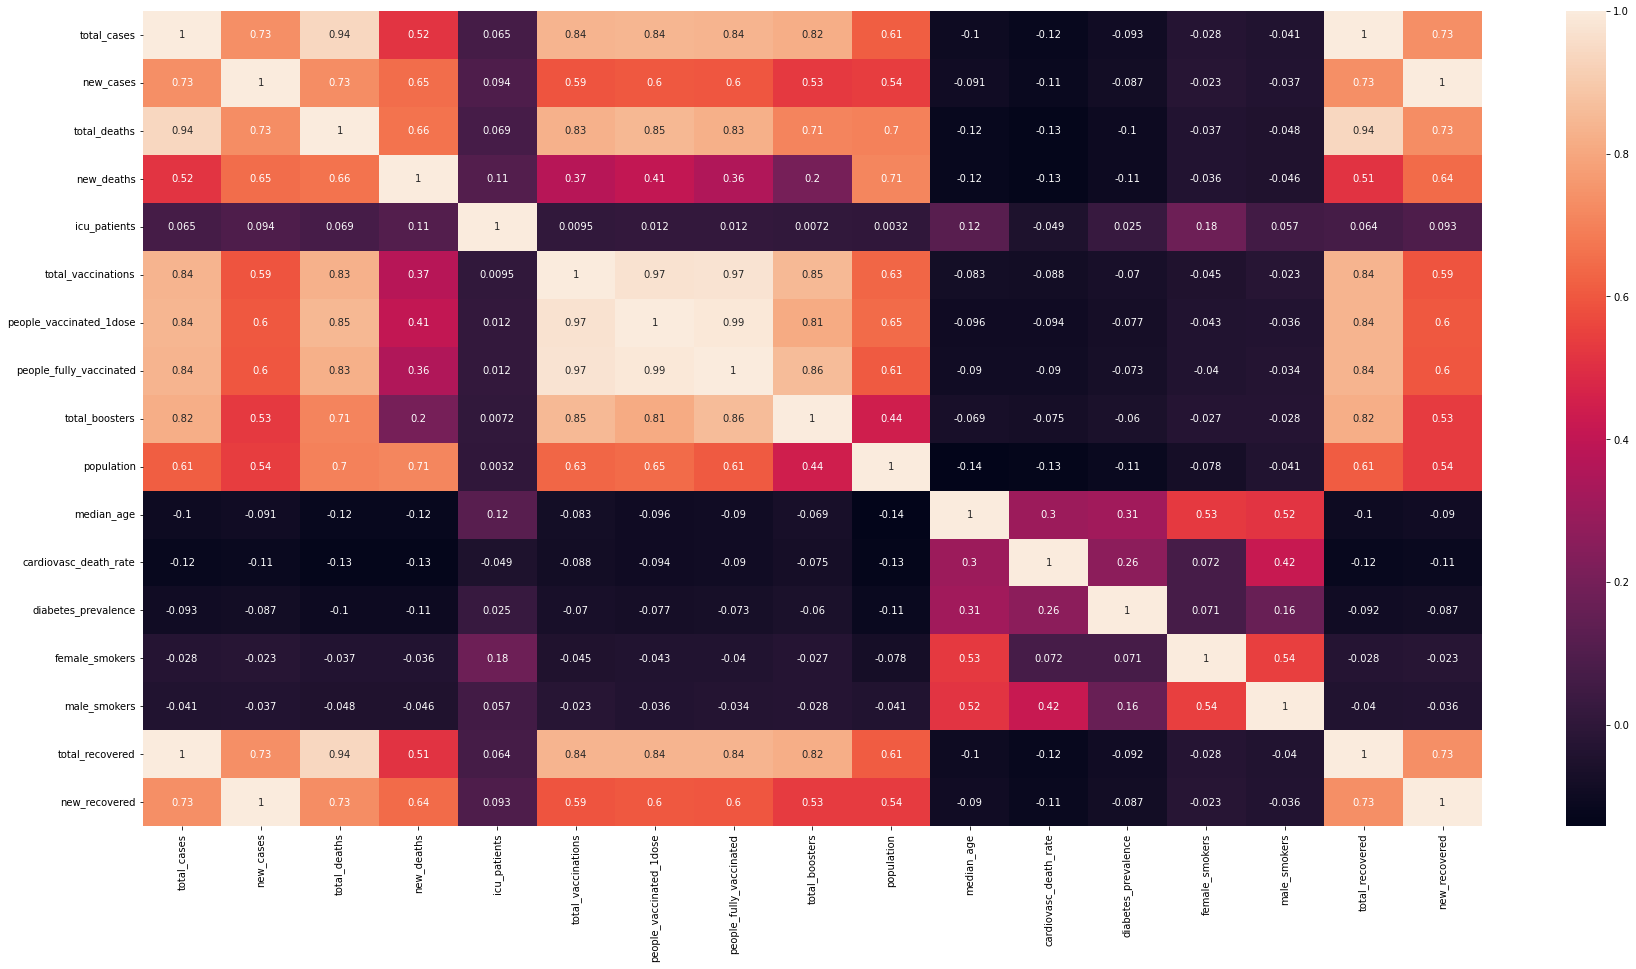

In [123]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Australia, China, India, United States

In [124]:
dfaciu=df[df['location'].isin(['Australia','China','India','United States'])]
dfaciu

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
10768,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,4.0,4.0
10769,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,5.0,1.0
10770,Oceania,Australia,2020-01-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,5.0,0.0
10771,Oceania,Australia,2020-01-29,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,6.0,1.0
10772,Oceania,Australia,2020-01-30,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196059,North America,United States,2022-03-08,91794533.0,205725.0,1032195.0,1115.0,4696.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,90762338.0,204610.0
196060,North America,United States,2022-04-08,91961519.0,166986.0,1032820.0,625.0,4627.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,90928699.0,166361.0
196061,North America,United States,2022-05-08,92090455.0,128936.0,1033516.0,696.0,4599.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,91056939.0,128240.0
196062,North America,United States,2022-06-08,92102659.0,12204.0,1034152.0,636.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,91068507.0,11568.0


<BarContainer object of 3704 artists>

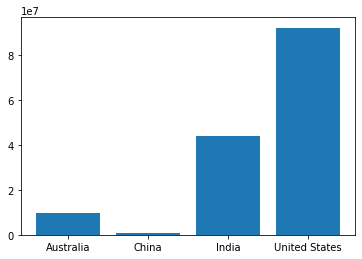

In [125]:
plt.bar(dfaciu['location'],dfaciu['total_cases'])

<BarContainer object of 3704 artists>

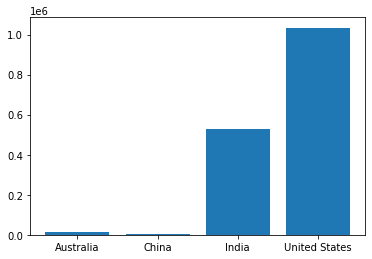

In [126]:
plt.bar(dfaciu['location'],dfaciu['total_deaths'])

Total cases and deaths are more in United States, next stands India.

<BarContainer object of 3704 artists>

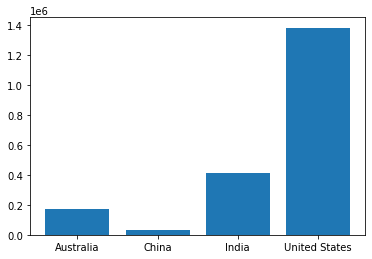

In [127]:
plt.bar(dfaciu['location'],dfaciu['new_cases'])

<BarContainer object of 3704 artists>

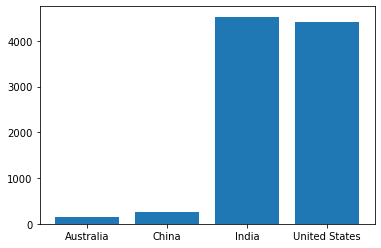

In [128]:
plt.bar(dfaciu['location'],dfaciu['new_deaths'])

The new cases are more in United States whereas India reported more no of new deaths

Whereas China shows the lowest no of new cases but on contrary shows a more no of deaths

<BarContainer object of 3704 artists>

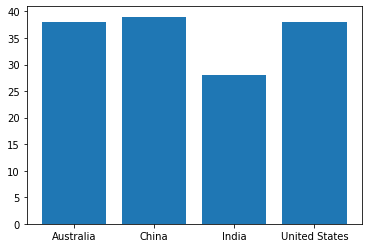

In [129]:
plt.bar(dfaciu['location'],dfaciu['median_age'])

The median age of India is lowest among all and is around 27, which means that the younger and the middle aged were affected by the virus the most.

Contemporarily, China shows highest median age which is near to 40.

<BarContainer object of 3704 artists>

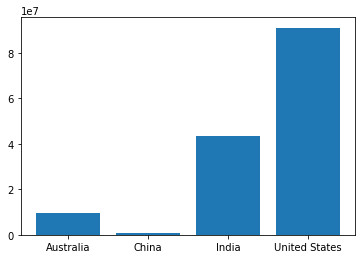

In [130]:
plt.bar(dfaciu['location'],dfaciu['total_recovered'])

<BarContainer object of 3704 artists>

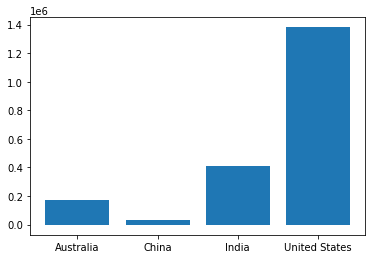

In [131]:
plt.bar(dfaciu['location'],dfaciu['new_recovered'])

United States shows the highest among all others in terms of recovery rate (both total and new recovered). Whereas China shows the lowest

In [132]:
dfaciu.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.429045,0.980095,0.359897,0.397514,0.110204,0.529081,0.468985,0.295895,-0.076491,-0.203086,-0.021791,0.411027,0.316805,-0.232827,0.999997,0.428332
new_cases,0.429045,1.000000,0.447711,0.656773,0.591765,-0.074936,0.093289,0.069231,0.112224,-0.109734,-0.076369,-0.076240,0.247594,0.268140,-0.162468,0.428685,0.999977
total_deaths,0.980095,0.447711,1.000000,0.418414,0.505336,0.080626,0.501840,0.440914,0.259463,-0.100981,-0.176211,-0.043600,0.476800,0.383100,-0.228754,0.979571,0.446580
new_deaths,0.359897,0.656773,0.418414,1.000000,0.624022,-0.152195,0.033070,-0.008066,0.019547,-0.091359,-0.127693,-0.046710,0.369419,0.312746,-0.182394,0.359028,0.651637
icu_patients,0.397514,0.591765,0.505336,0.624022,1.000000,-0.122985,-0.007431,0.006576,0.053395,-0.305549,0.205882,-0.282341,0.343781,0.561218,-0.097361,0.395985,0.589631
total_vaccinations,0.110204,-0.074936,0.080626,-0.152195,-0.122985,1.000000,0.435714,0.474683,0.267183,0.439799,-0.004708,0.412106,0.261796,-0.384606,0.453091,0.110565,-0.074007
people_vaccinated_1dose,0.529081,0.093289,0.501840,0.033070,-0.007431,0.435714,1.000000,0.927272,0.425591,0.261261,-0.458644,0.304769,0.233002,-0.192105,-0.137178,0.529300,0.093541
people_fully_vaccinated,0.468985,0.069231,0.440914,-0.008066,0.006576,0.474683,0.927272,1.000000,0.501518,0.224771,-0.336654,0.255938,0.215421,-0.156156,-0.064748,0.469231,0.069711
total_boosters,0.295895,0.112224,0.259463,0.019547,0.053395,0.267183,0.425591,0.501518,1.000000,0.005720,0.071393,0.003078,0.121439,0.061389,0.078143,0.296297,0.112709
population,-0.076491,-0.109734,-0.100981,-0.091359,-0.305549,0.439799,0.261261,0.224771,0.005720,1.000000,-0.482278,0.993693,0.577264,-0.891237,0.603418,-0.076148,-0.109558


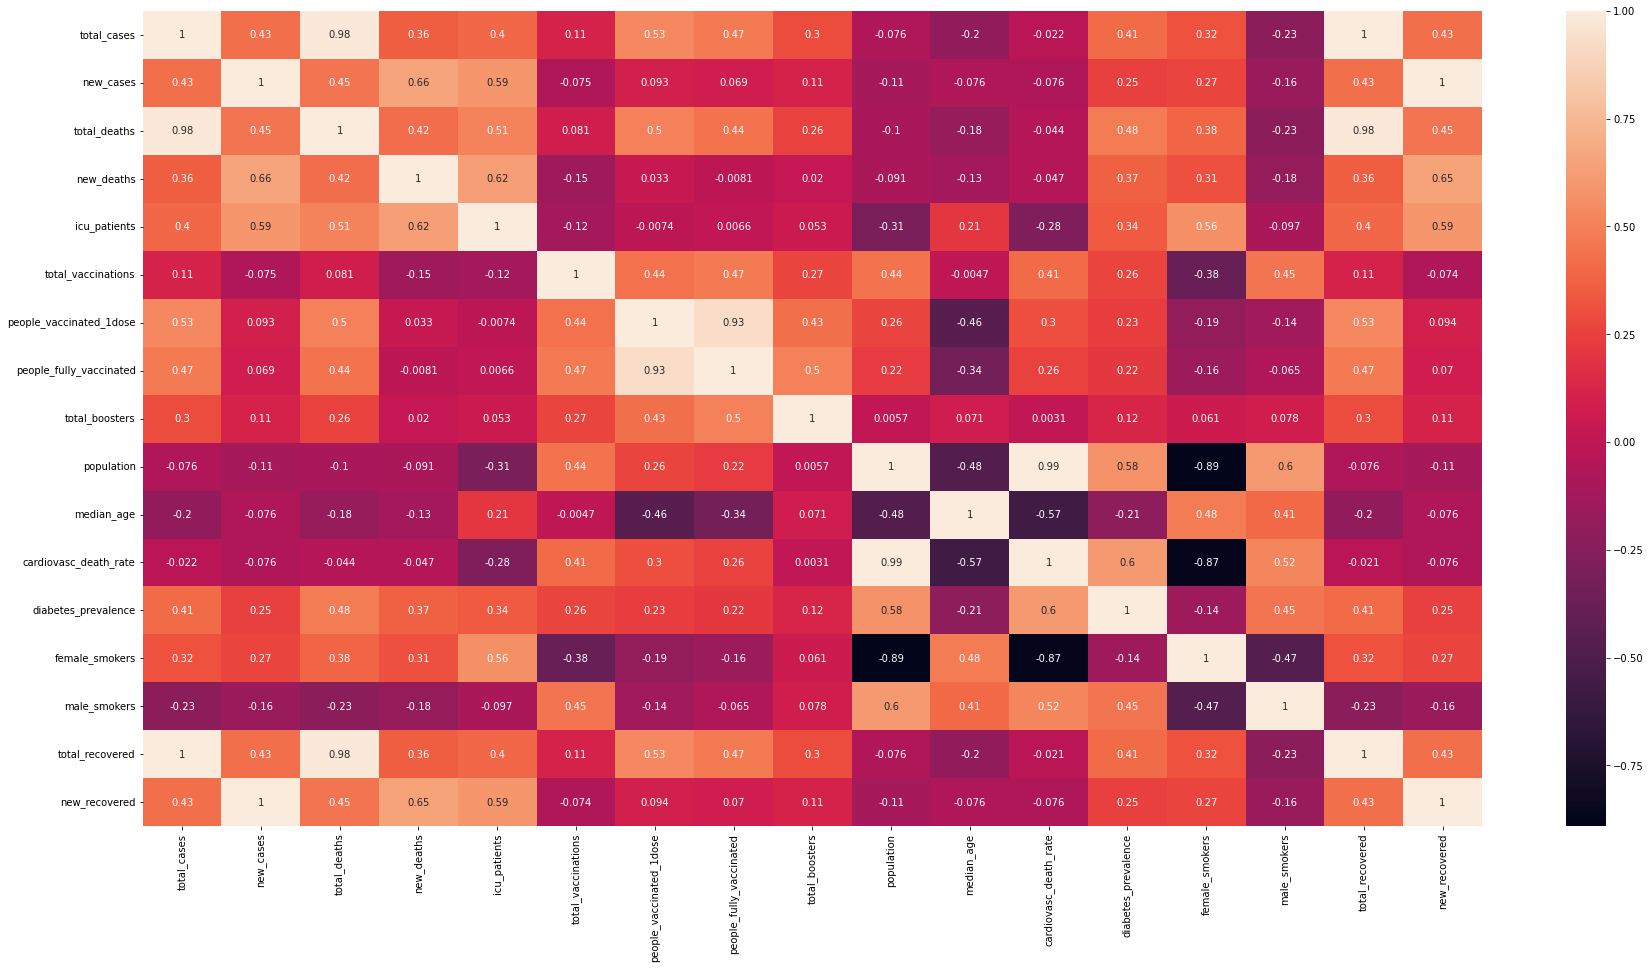

In [133]:
plt.figure(figsize=(30,15))
sns.heatmap(dfaciu.corr(),annot=True)
plt.show()

    We can infer that the new_cases and the new_recovered are highly correlated. Similarly, population is also highly correlated to deaths due to cardiovascular disease

# India

In [179]:
ind=df[df['location'].isin(['India'])]
ind

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
85361,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,1.0,1.0
85362,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,1.0,0.0
85363,Asia,India,2020-01-02,1.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,1.0,0.0
85364,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,2.0,1.0
85365,Asia,India,2020-03-02,3.0,1.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86277,Asia,India,2022-03-08,44087037.0,19893.0,526530.0,53.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,43560507.0,19840.0
86278,Asia,India,2022-04-08,44107588.0,20551.0,526600.0,70.0,0.0,2.052900e+09,1.021769e+09,934056723.0,97074830.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,43580988.0,20481.0
86279,Asia,India,2022-05-08,44126994.0,19406.0,526649.0,49.0,0.0,2.056488e+09,1.021971e+09,934624191.0,99893095.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,43600345.0,19357.0
86280,Asia,India,2022-06-08,44145709.0,18715.0,526689.0,40.0,0.0,2.059773e+09,1.022134e+09,935057847.0,102581049.0,1.407564e+09,28.0,282.0,10.0,2.0,21.0,43619020.0,18675.0


In [180]:
ind.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.033464,0.995516,-0.009518,NaN,0.878004,0.906096,0.826558,0.561918,NaN,NaN,NaN,NaN,NaN,NaN,0.999999,0.033848
new_cases,0.033464,1.000000,0.008910,0.752046,NaN,-0.106755,-0.090120,-0.120627,-0.161581,NaN,NaN,NaN,NaN,NaN,NaN,0.033767,0.999973
total_deaths,0.995516,0.008910,1.000000,-0.033401,NaN,0.862267,0.898925,0.802266,0.518392,NaN,NaN,NaN,NaN,NaN,NaN,0.995404,0.009355
new_deaths,-0.009518,0.752046,-0.033401,1.000000,NaN,-0.227456,-0.202569,-0.249579,-0.224273,NaN,NaN,NaN,NaN,NaN,NaN,-0.009221,0.747203
icu_patients,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_vaccinations,0.878004,-0.106755,0.862267,-0.227456,NaN,1.000000,0.989872,0.988324,0.732508,NaN,NaN,NaN,NaN,NaN,NaN,0.878149,-0.105118
people_vaccinated_1dose,0.906096,-0.090120,0.898925,-0.202569,NaN,0.989872,1.000000,0.956924,0.657940,NaN,NaN,NaN,NaN,NaN,NaN,0.906134,-0.088621
people_fully_vaccinated,0.826558,-0.120627,0.802266,-0.249579,NaN,0.988324,0.956924,1.000000,0.784162,NaN,NaN,NaN,NaN,NaN,NaN,0.826813,-0.118860
total_boosters,0.561918,-0.161581,0.518392,-0.224273,NaN,0.732508,0.657940,0.784162,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.562426,-0.160436
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


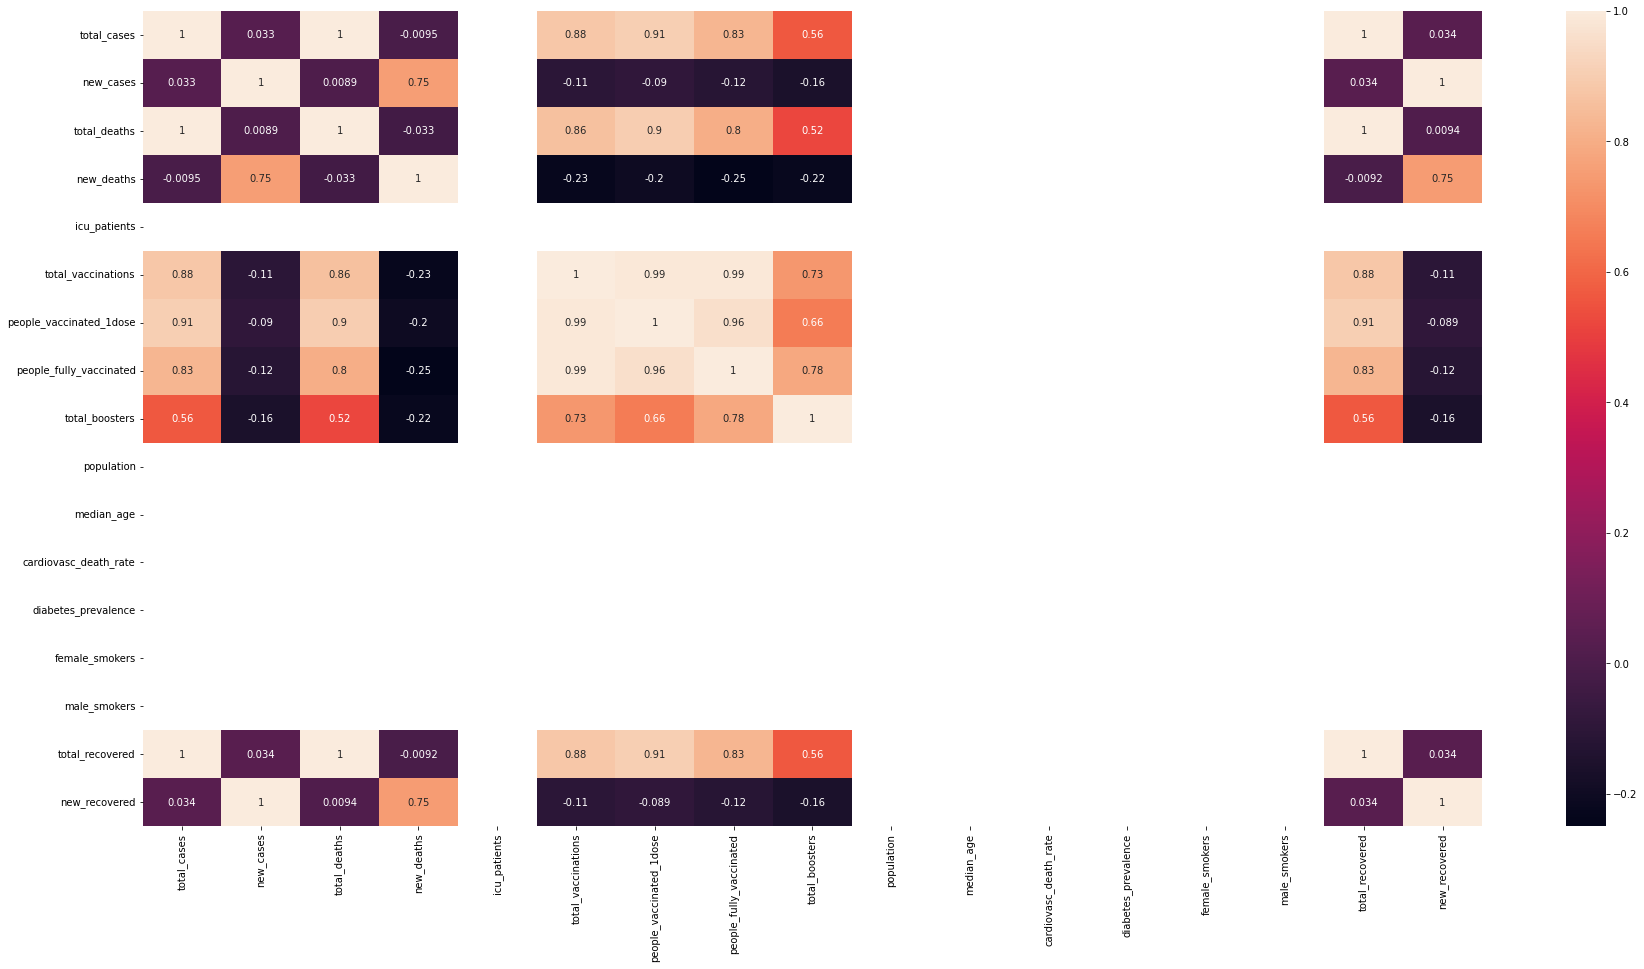

In [181]:
plt.figure(figsize=(30,15))
sns.heatmap(ind.corr(),annot=True)
plt.show()

We can see that, many of the variables are not correlated. So, we remove those variables which are not correlated
So, here we can see population, median_age, cardiovasc_death_rate, diabetes_prevalance, female_smokers, male_smokers, icu_patients are the variables which don't have any correlation, so we remove those variables

In [182]:
ind1=ind.drop(columns={'population', 'median_age', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'icu_patients'})

In [183]:
ind1.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,total_recovered,new_recovered
total_cases,1.000000,0.033464,0.995516,-0.009518,0.878004,0.906096,0.826558,0.561918,0.999999,0.033848
new_cases,0.033464,1.000000,0.008910,0.752046,-0.106755,-0.090120,-0.120627,-0.161581,0.033767,0.999973
total_deaths,0.995516,0.008910,1.000000,-0.033401,0.862267,0.898925,0.802266,0.518392,0.995404,0.009355
new_deaths,-0.009518,0.752046,-0.033401,1.000000,-0.227456,-0.202569,-0.249579,-0.224273,-0.009221,0.747203
total_vaccinations,0.878004,-0.106755,0.862267,-0.227456,1.000000,0.989872,0.988324,0.732508,0.878149,-0.105118
people_vaccinated_1dose,0.906096,-0.090120,0.898925,-0.202569,0.989872,1.000000,0.956924,0.657940,0.906134,-0.088621
people_fully_vaccinated,0.826558,-0.120627,0.802266,-0.249579,0.988324,0.956924,1.000000,0.784162,0.826813,-0.118860
total_boosters,0.561918,-0.161581,0.518392,-0.224273,0.732508,0.657940,0.784162,1.000000,0.562426,-0.160436
total_recovered,0.999999,0.033767,0.995404,-0.009221,0.878149,0.906134,0.826813,0.562426,1.000000,0.034150
new_recovered,0.033848,0.999973,0.009355,0.747203,-0.105118,-0.088621,-0.118860,-0.160436,0.034150,1.000000


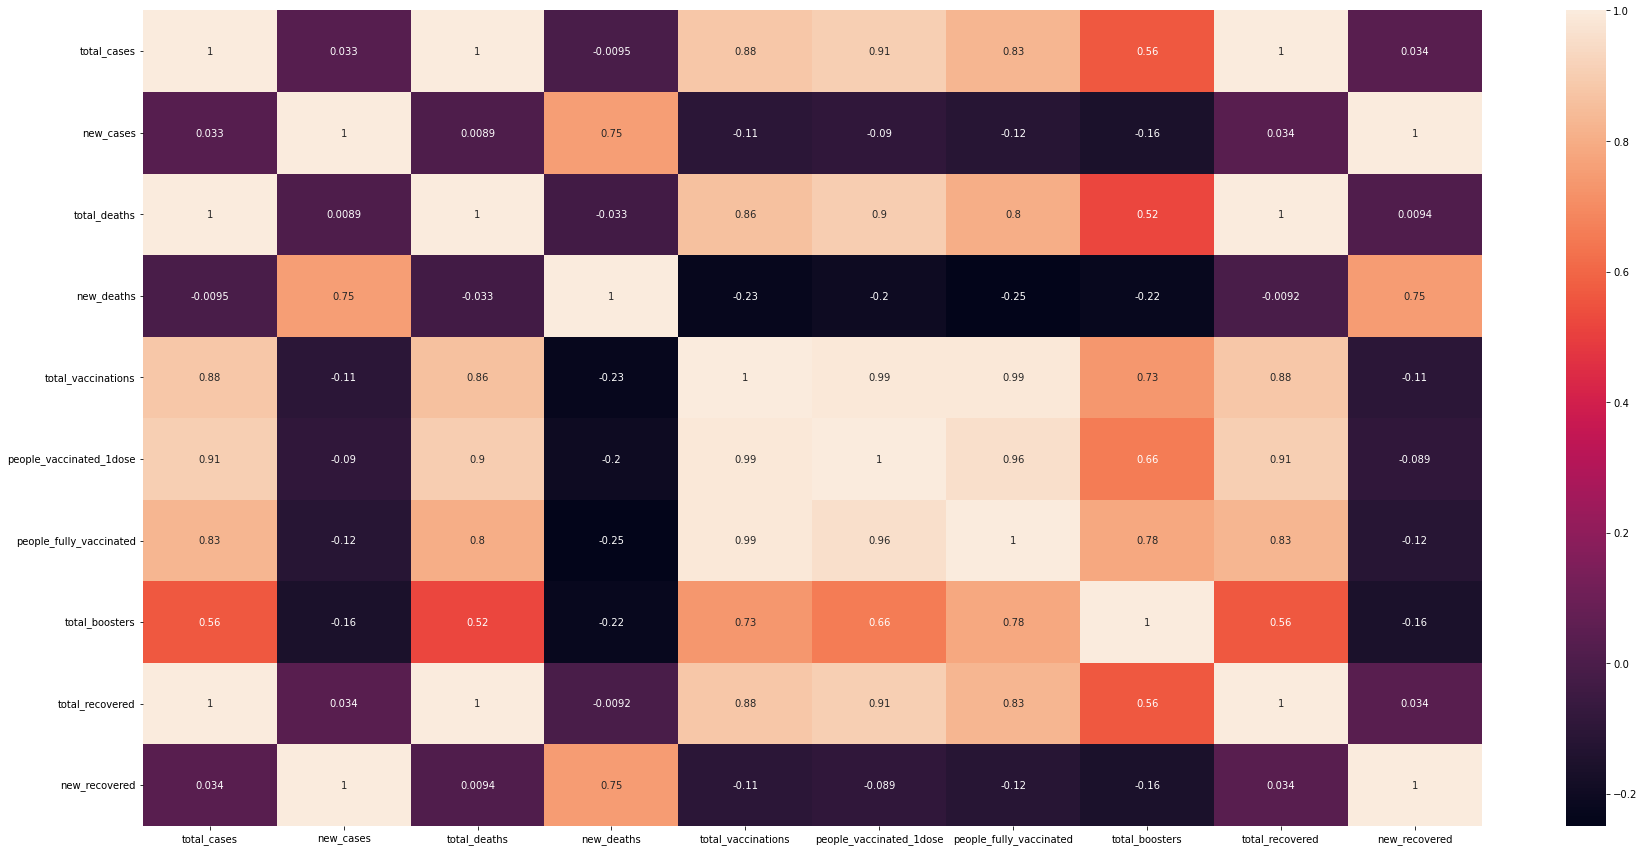

In [184]:
plt.figure(figsize=(30,15))
sns.heatmap(ind1.corr(),annot=True)
plt.show()

From the above correlation matrix we can infer that the people_fully_vaccinated and total_recovered are highly correlated. It means that the vaccinations have an effect on the no of people who are total_recovered.

Also, people who are fully vaccinated is highly correlated with total_deaths happening.

# China

In [185]:
chi=df[df['location'].isin(['China'])]
chi

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
38193,Asia,China,2020-01-22,547.0,0.0,17.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,530.0,0.0
38194,Asia,China,2020-01-23,639.0,92.0,18.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,621.0,91.0
38195,Asia,China,2020-01-24,916.0,277.0,26.0,8.0,0.0,0.000000e+00,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,890.0,269.0
38196,Asia,China,2020-01-25,1399.0,483.0,42.0,16.0,0.0,0.000000e+00,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,1357.0,467.0
38197,Asia,China,2020-01-26,2062.0,663.0,56.0,14.0,0.0,0.000000e+00,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,2006.0,649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,Asia,China,2022-03-08,907270.0,421.0,5226.0,0.0,0.0,3.424838e+09,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,902044.0,421.0
39118,Asia,China,2022-04-08,907689.0,419.0,5226.0,0.0,0.0,3.425218e+09,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,902463.0,419.0
39119,Asia,China,2022-05-08,908198.0,509.0,5226.0,0.0,0.0,3.425593e+09,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,902972.0,509.0
39120,Asia,China,2022-06-08,908875.0,677.0,5226.0,0.0,0.0,3.425843e+09,0.0,0.0,0.0,1.425893e+09,39.0,262.0,10.0,2.0,48.0,903649.0,677.0


In [186]:
chi.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.277052,0.369145,-0.023520,NaN,0.641166,0.205981,0.163310,0.280909,NaN,NaN,NaN,NaN,NaN,NaN,0.999996,0.277447
new_cases,0.277052,1.000000,-0.026691,0.188812,NaN,0.319424,0.142650,0.112720,0.178391,NaN,NaN,NaN,NaN,NaN,NaN,0.277461,0.999987
total_deaths,0.369145,-0.026691,1.000000,-0.607877,NaN,0.362891,0.091552,0.092054,0.099170,NaN,NaN,NaN,NaN,NaN,NaN,0.366396,-0.023523
new_deaths,-0.023520,0.188812,-0.607877,1.000000,NaN,-0.114518,-0.007715,-0.019368,0.006814,NaN,NaN,NaN,NaN,NaN,NaN,-0.021614,0.183743
icu_patients,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_vaccinations,0.641166,0.319424,0.362891,-0.114518,NaN,1.000000,0.268344,0.291631,0.249059,NaN,NaN,NaN,NaN,NaN,NaN,0.640761,0.320338
people_vaccinated_1dose,0.205981,0.142650,0.091552,-0.007715,NaN,0.268344,1.000000,0.859299,0.827445,NaN,NaN,NaN,NaN,NaN,NaN,0.205931,0.142830
people_fully_vaccinated,0.163310,0.112720,0.092054,-0.019368,NaN,0.291631,0.859299,1.000000,0.749380,NaN,NaN,NaN,NaN,NaN,NaN,0.163208,0.112932
total_boosters,0.280909,0.178391,0.099170,0.006814,NaN,0.249059,0.827445,0.749380,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.280923,0.178530
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


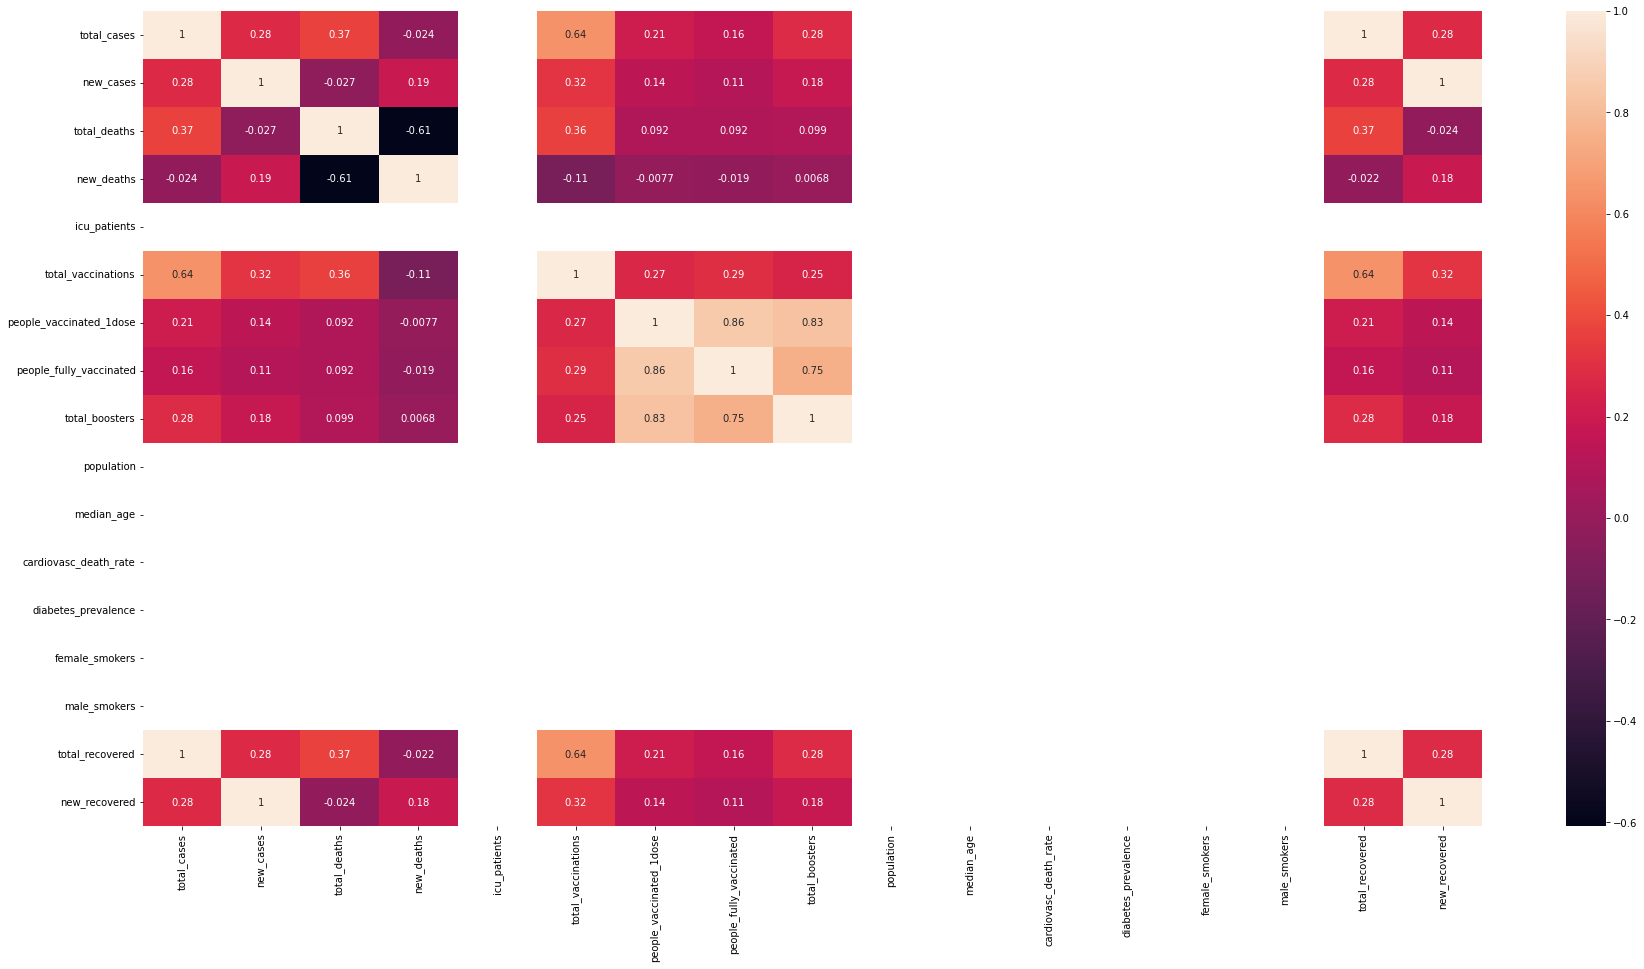

In [187]:
plt.figure(figsize=(30,15))
sns.heatmap(chi.corr(),annot=True)
plt.show()

We can see that, many of the variables are not correlated. So, we remove those variables which are not correlated
So, here we can see population, median_age, cardiovasc_death_rate, diabetes_prevalance, female_smokers, male_smokers, icu_patients are the variables which don't have any correlation, so we remove those variables

In [188]:
chi1=chi.drop(columns={'population', 'median_age', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'icu_patients'})

In [189]:
chi1.corr()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,total_recovered,new_recovered
total_cases,1.000000,0.277052,0.369145,-0.023520,0.641166,0.205981,0.163310,0.280909,0.999996,0.277447
new_cases,0.277052,1.000000,-0.026691,0.188812,0.319424,0.142650,0.112720,0.178391,0.277461,0.999987
total_deaths,0.369145,-0.026691,1.000000,-0.607877,0.362891,0.091552,0.092054,0.099170,0.366396,-0.023523
new_deaths,-0.023520,0.188812,-0.607877,1.000000,-0.114518,-0.007715,-0.019368,0.006814,-0.021614,0.183743
total_vaccinations,0.641166,0.319424,0.362891,-0.114518,1.000000,0.268344,0.291631,0.249059,0.640761,0.320338
people_vaccinated_1dose,0.205981,0.142650,0.091552,-0.007715,0.268344,1.000000,0.859299,0.827445,0.205931,0.142830
people_fully_vaccinated,0.163310,0.112720,0.092054,-0.019368,0.291631,0.859299,1.000000,0.749380,0.163208,0.112932
total_boosters,0.280909,0.178391,0.099170,0.006814,0.249059,0.827445,0.749380,1.000000,0.280923,0.178530
total_recovered,0.999996,0.277461,0.366396,-0.021614,0.640761,0.205931,0.163208,0.280923,1.000000,0.277846
new_recovered,0.277447,0.999987,-0.023523,0.183743,0.320338,0.142830,0.112932,0.178530,0.277846,1.000000


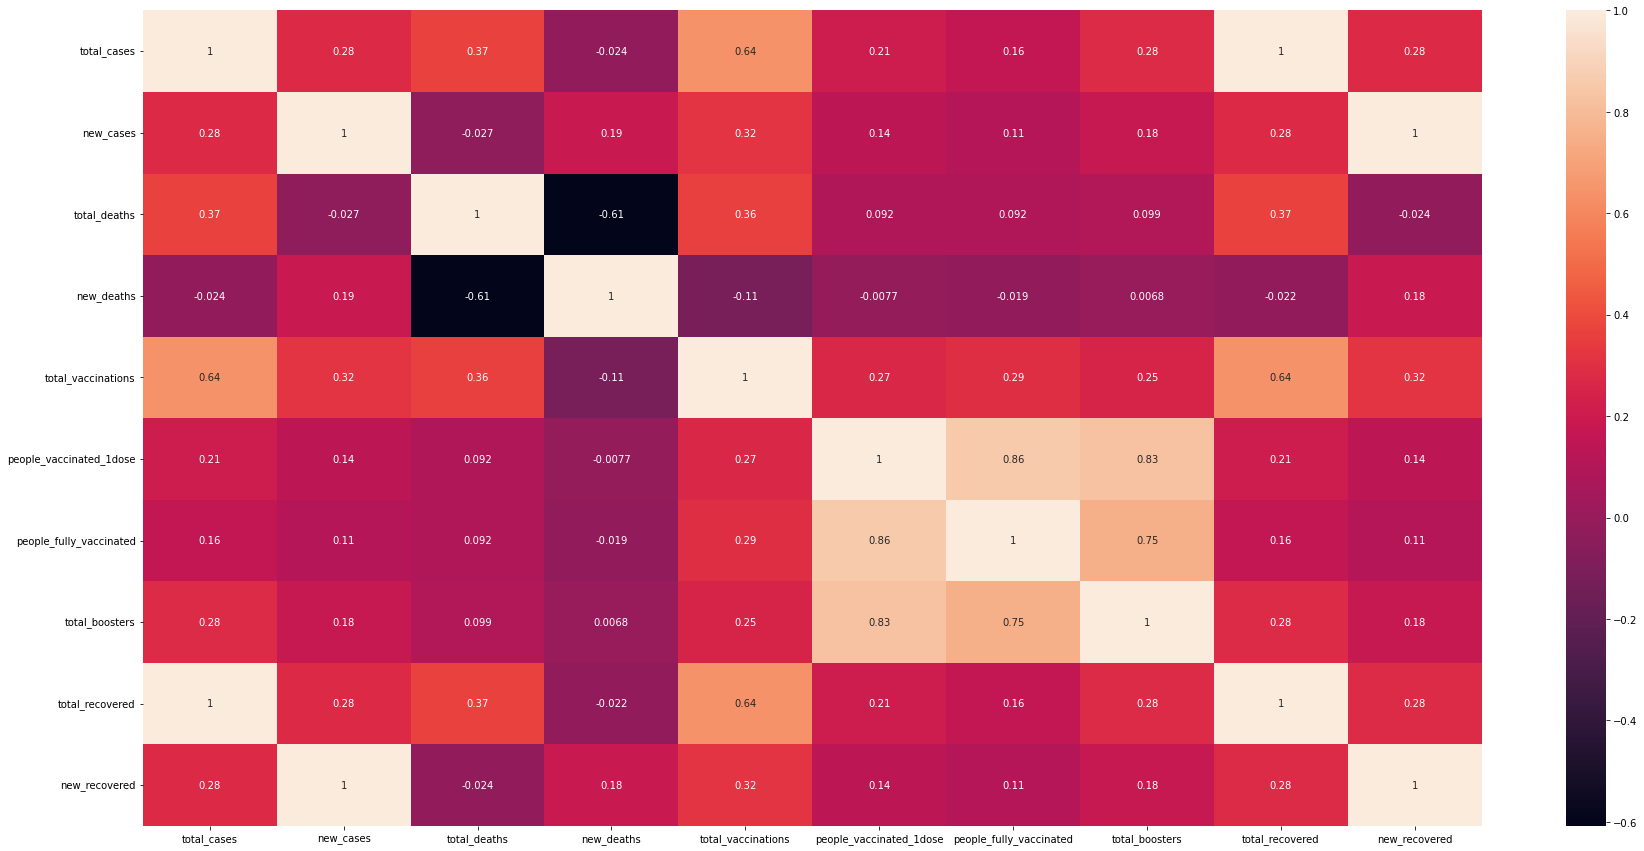

In [218]:
plt.figure(figsize=(30,15))
sns.heatmap(chi1.corr(),annot=True)
plt.show()

Here, the correlation between people who are fully vaccinated and the total recovered is very less compared to that of india

# Australia

In [191]:
aus=df[df['location'].isin(['Australia'])]
aus

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
10768,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,4.0,4.0
10769,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,5.0,1.0
10770,Oceania,Australia,2020-01-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,5.0,0.0
10771,Oceania,Australia,2020-01-29,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,6.0,1.0
10772,Oceania,Australia,2020-01-30,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,Oceania,Australia,2022-03-08,9554438.0,37214.0,12111.0,85.0,161.0,58251364.0,22400065.0,21734949.0,14116350.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9542327.0,37129.0
11689,Oceania,Australia,2022-04-08,9586984.0,32546.0,12201.0,90.0,154.0,58260465.0,22401543.0,21736491.0,14122431.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9574783.0,32456.0
11690,Oceania,Australia,2022-05-08,9615463.0,28479.0,12289.0,88.0,151.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9603174.0,28391.0
11691,Oceania,Australia,2022-06-08,9638079.0,22616.0,12321.0,32.0,161.0,0.0,0.0,0.0,0.0,25921089.0,38.0,108.0,5.0,13.0,17.0,9625758.0,22584.0


In [192]:
aus.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.692938,0.986703,0.742665,0.330523,0.762534,0.644970,0.705314,0.910123,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.692658
new_cases,0.692938,1.000000,0.700960,0.707122,0.554320,0.750091,0.683817,0.732127,0.767925,NaN,NaN,NaN,NaN,NaN,NaN,0.692918,1.000000
total_deaths,0.986703,0.700960,1.000000,0.749601,0.393874,0.815952,0.716060,0.767334,0.908760,NaN,NaN,NaN,NaN,NaN,NaN,0.986673,0.700678
new_deaths,0.742665,0.707122,0.749601,1.000000,0.578474,0.722137,0.653994,0.699027,0.741252,NaN,NaN,NaN,NaN,NaN,NaN,0.742646,0.706568
icu_patients,0.330523,0.554320,0.393874,0.578474,1.000000,0.693978,0.762301,0.728157,0.385224,NaN,NaN,NaN,NaN,NaN,NaN,0.330445,0.554113
total_vaccinations,0.762534,0.750091,0.815952,0.722137,0.693978,1.000000,0.971327,0.989498,0.870759,NaN,NaN,NaN,NaN,NaN,NaN,0.762461,0.749879
people_vaccinated_1dose,0.644970,0.683817,0.716060,0.653994,0.762301,0.971327,1.000000,0.979628,0.755178,NaN,NaN,NaN,NaN,NaN,NaN,0.644878,0.683628
people_fully_vaccinated,0.705314,0.732127,0.767334,0.699027,0.728157,0.989498,0.979628,1.000000,0.814227,NaN,NaN,NaN,NaN,NaN,NaN,0.705232,0.731926
total_boosters,0.910123,0.767925,0.908760,0.741252,0.385224,0.870759,0.755178,0.814227,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.910110,0.767705
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


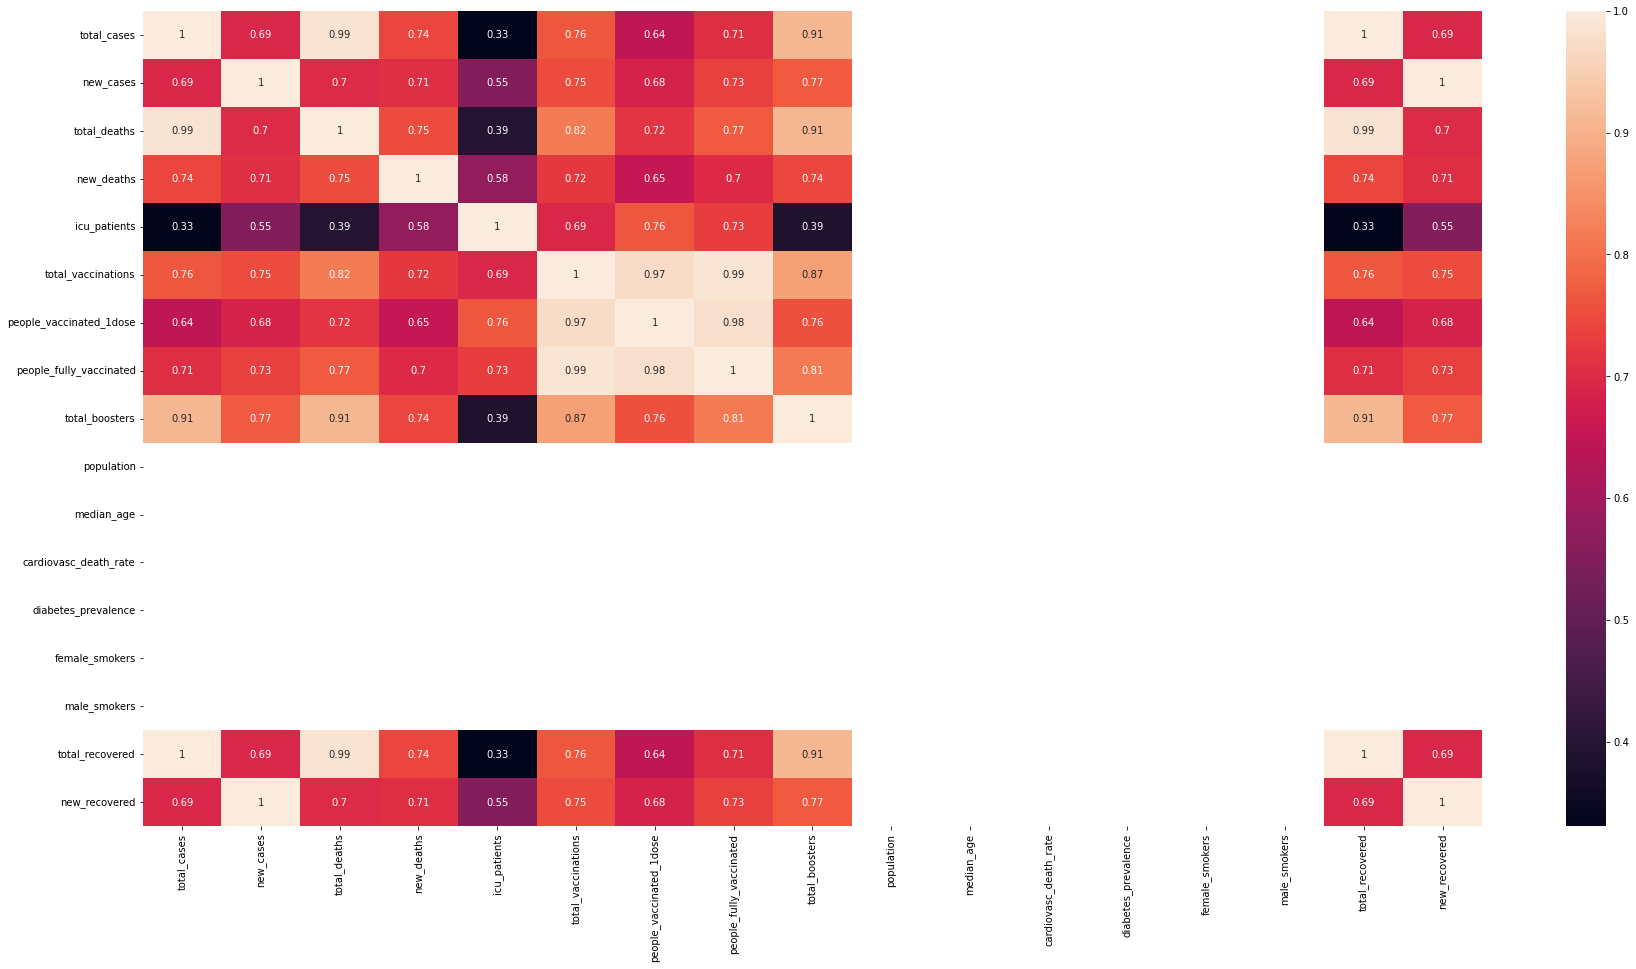

In [193]:
plt.figure(figsize=(30,15))
sns.heatmap(aus.corr(),annot=True)
plt.show()

We infer from the above correlation matrix that, there is no correlation for variables population, median_age, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers. So, we remove those variables from theis dataset

In [194]:
aus1=aus.drop(columns={'population','median_age','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers'})

In [195]:
aus1.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,total_recovered,new_recovered
total_cases,1.000000,0.692938,0.986703,0.742665,0.330523,0.762534,0.644970,0.705314,0.910123,1.000000,0.692658
new_cases,0.692938,1.000000,0.700960,0.707122,0.554320,0.750091,0.683817,0.732127,0.767925,0.692918,1.000000
total_deaths,0.986703,0.700960,1.000000,0.749601,0.393874,0.815952,0.716060,0.767334,0.908760,0.986673,0.700678
new_deaths,0.742665,0.707122,0.749601,1.000000,0.578474,0.722137,0.653994,0.699027,0.741252,0.742646,0.706568
icu_patients,0.330523,0.554320,0.393874,0.578474,1.000000,0.693978,0.762301,0.728157,0.385224,0.330445,0.554113
total_vaccinations,0.762534,0.750091,0.815952,0.722137,0.693978,1.000000,0.971327,0.989498,0.870759,0.762461,0.749879
people_vaccinated_1dose,0.644970,0.683817,0.716060,0.653994,0.762301,0.971327,1.000000,0.979628,0.755178,0.644878,0.683628
people_fully_vaccinated,0.705314,0.732127,0.767334,0.699027,0.728157,0.989498,0.979628,1.000000,0.814227,0.705232,0.731926
total_boosters,0.910123,0.767925,0.908760,0.741252,0.385224,0.870759,0.755178,0.814227,1.000000,0.910110,0.767705
total_recovered,1.000000,0.692918,0.986673,0.742646,0.330445,0.762461,0.644878,0.705232,0.910110,1.000000,0.692638


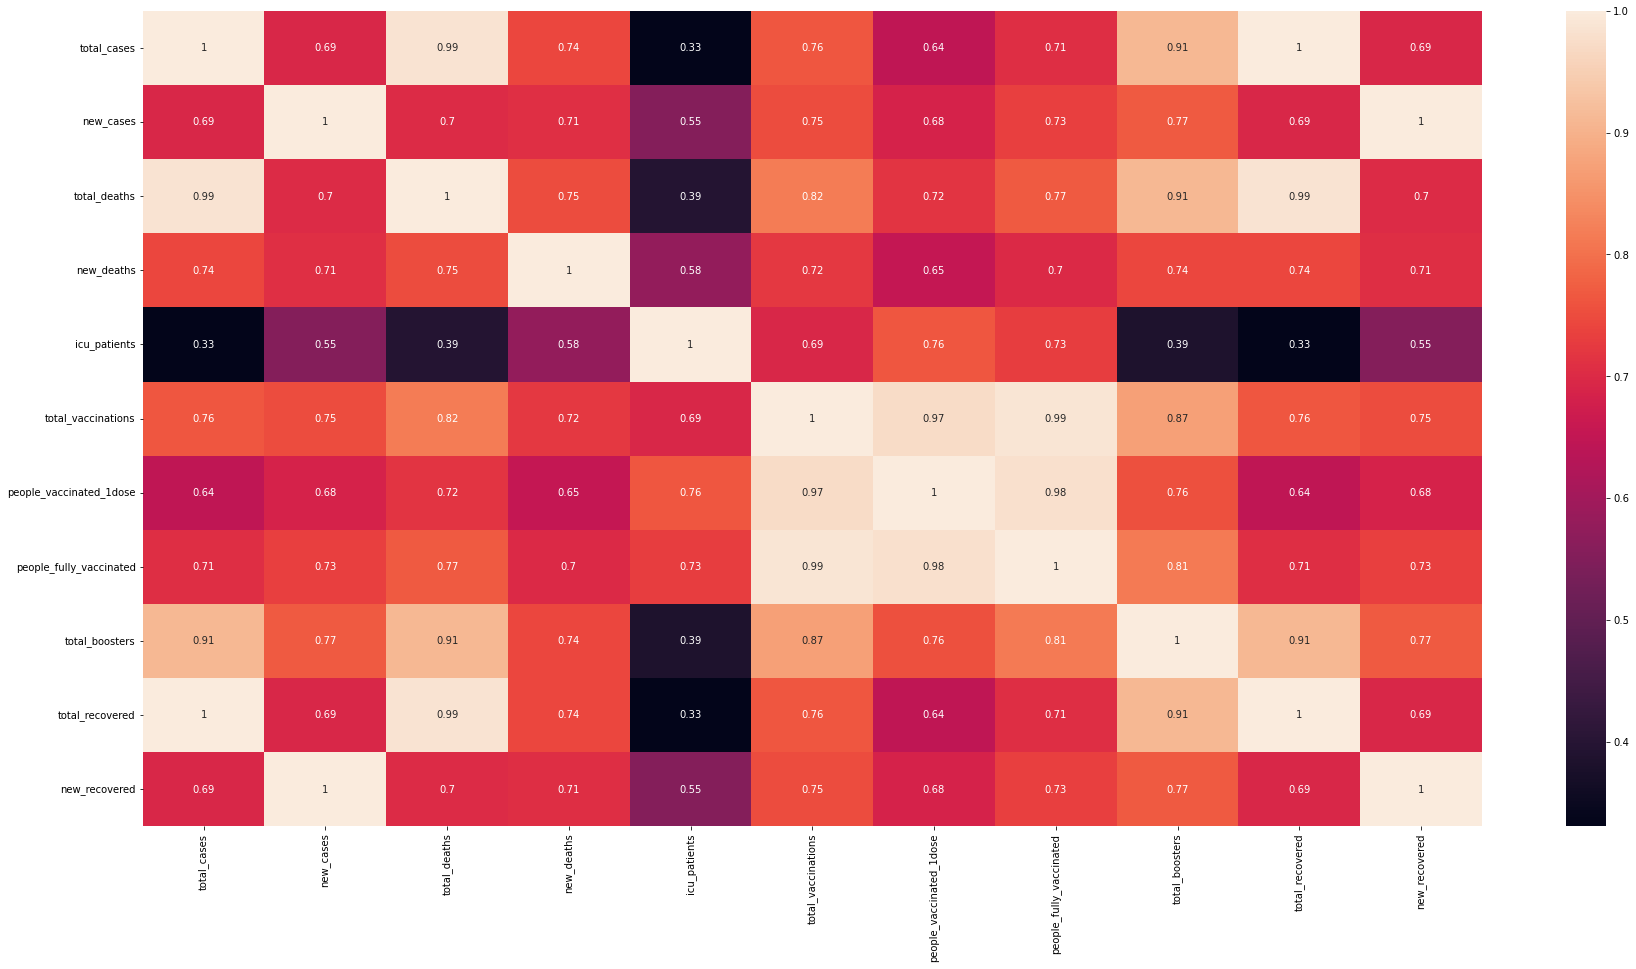

In [217]:
plt.figure(figsize=(30,15))
sns.heatmap(aus1.corr(),annot=True)
plt.show()

From the above correlation matrix, we can infer that, vaccinations had a good impact on the deaths and the recovered cases.

# United States

In [197]:
usa=df[df['location'].isin(['United States'])]
usa

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
195135,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,1.0,0.0
195136,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,1.0,0.0
195137,North America,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,2.0,1.0
195138,North America,United States,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,2.0,0.0
195139,North America,United States,2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196059,North America,United States,2022-03-08,91794533.0,205725.0,1032195.0,1115.0,4696.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,90762338.0,204610.0
196060,North America,United States,2022-04-08,91961519.0,166986.0,1032820.0,625.0,4627.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,90928699.0,166361.0
196061,North America,United States,2022-05-08,92090455.0,128936.0,1033516.0,696.0,4599.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,91056939.0,128240.0
196062,North America,United States,2022-06-08,92102659.0,12204.0,1034152.0,636.0,0.0,0.0,0.0,0.0,0.0,336997624.0,38.0,151.0,11.0,19.0,25.0,91068507.0,11568.0


In [198]:
usa.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,population,median_age,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,total_recovered,new_recovered
total_cases,1.000000,0.268674,0.975548,-0.034826,0.045830,0.930286,0.899331,0.888449,0.887768,NaN,NaN,NaN,NaN,NaN,NaN,0.999997,0.269826
new_cases,0.268674,1.000000,0.279911,0.477738,0.574639,0.259043,0.248321,0.244868,0.260808,NaN,NaN,NaN,NaN,NaN,NaN,0.268467,0.999981
total_deaths,0.975548,0.279911,1.000000,-0.004395,0.144570,0.942485,0.936057,0.922005,0.795495,NaN,NaN,NaN,NaN,NaN,NaN,0.974985,0.280885
new_deaths,-0.034826,0.477738,-0.004395,1.000000,0.617769,-0.101202,-0.090280,-0.101796,-0.104003,NaN,NaN,NaN,NaN,NaN,NaN,-0.035169,0.472257
icu_patients,0.045830,0.574639,0.144570,0.617769,1.000000,0.036069,0.080365,0.072550,-0.148994,NaN,NaN,NaN,NaN,NaN,NaN,0.044671,0.572195
total_vaccinations,0.930286,0.259043,0.942485,-0.101202,0.036069,1.000000,0.991334,0.990604,0.826627,NaN,NaN,NaN,NaN,NaN,NaN,0.929878,0.260633
people_vaccinated_1dose,0.899331,0.248321,0.936057,-0.090280,0.080365,0.991334,1.000000,0.996987,0.747890,NaN,NaN,NaN,NaN,NaN,NaN,0.898647,0.249798
people_fully_vaccinated,0.888449,0.244868,0.922005,-0.101796,0.072550,0.990604,0.996987,1.000000,0.746172,NaN,NaN,NaN,NaN,NaN,NaN,0.887805,0.246414
total_boosters,0.887768,0.260808,0.795495,-0.104003,-0.148994,0.826627,0.747890,0.746172,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.888584,0.262424
population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


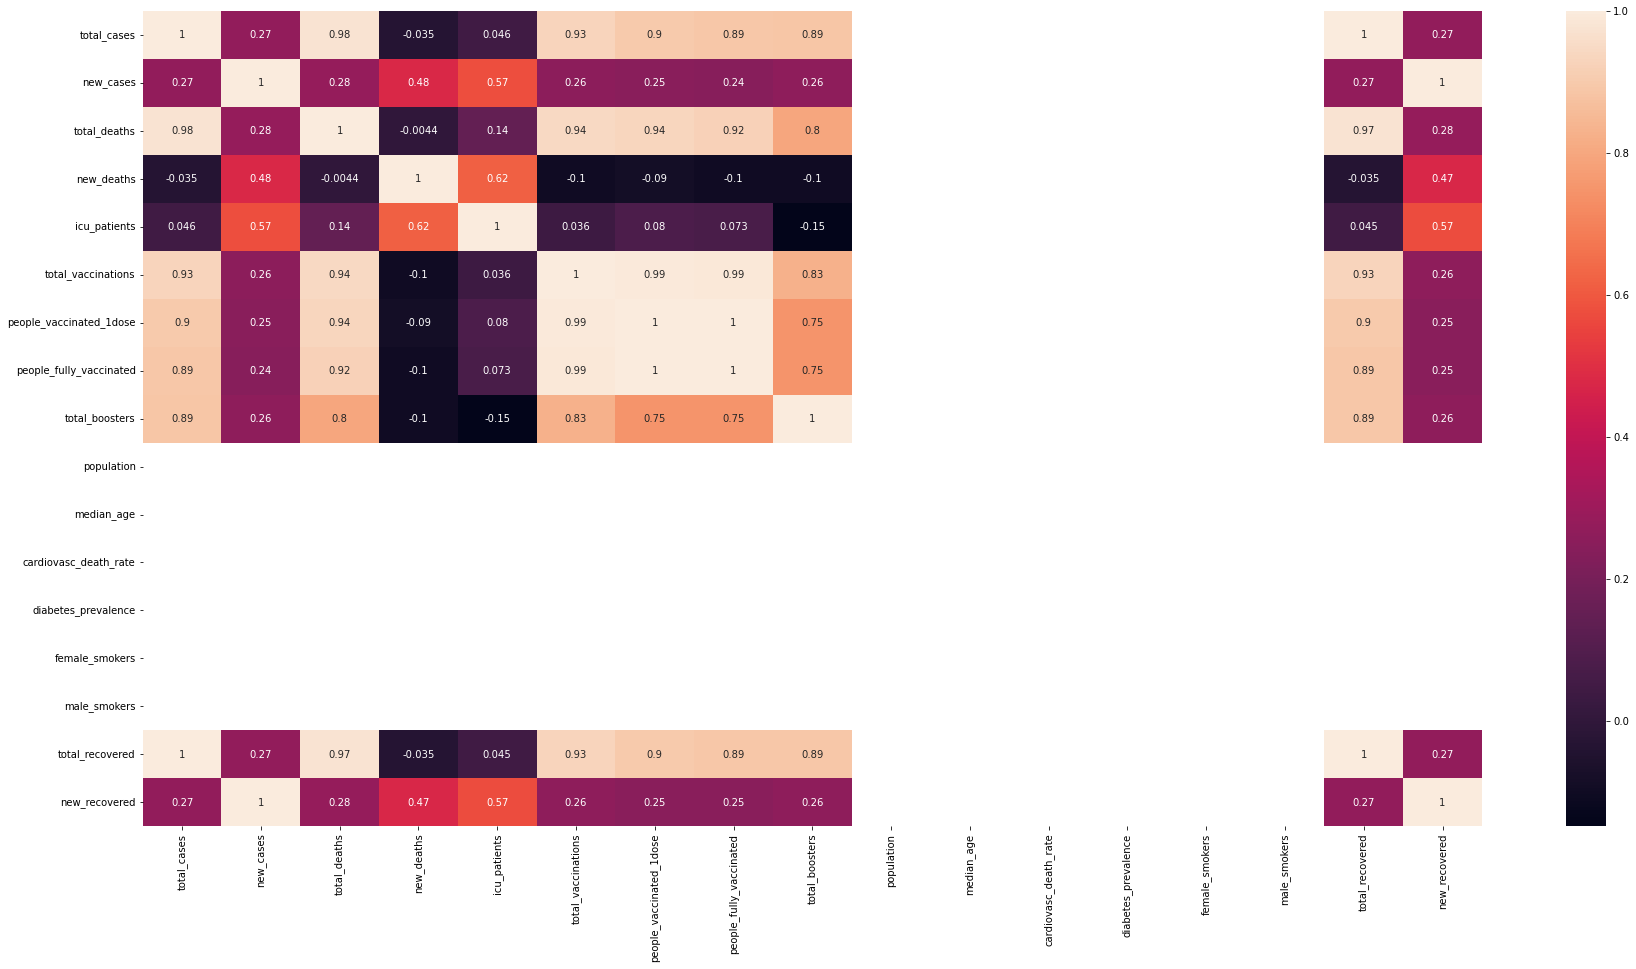

In [199]:
plt.figure(figsize=(30,15))
sns.heatmap(usa.corr(),annot=True)
plt.show()

We infer from the above correlation matrix that, there is no correlation for variables population, median_age, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers. So, we remove those variables from theis dataset

In [200]:
usa1=usa.drop(columns={'population','median_age','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers'})

In [201]:
usa1.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,people_vaccinated_1dose,people_fully_vaccinated,total_boosters,total_recovered,new_recovered
total_cases,1.000000,0.268674,0.975548,-0.034826,0.045830,0.930286,0.899331,0.888449,0.887768,0.999997,0.269826
new_cases,0.268674,1.000000,0.279911,0.477738,0.574639,0.259043,0.248321,0.244868,0.260808,0.268467,0.999981
total_deaths,0.975548,0.279911,1.000000,-0.004395,0.144570,0.942485,0.936057,0.922005,0.795495,0.974985,0.280885
new_deaths,-0.034826,0.477738,-0.004395,1.000000,0.617769,-0.101202,-0.090280,-0.101796,-0.104003,-0.035169,0.472257
icu_patients,0.045830,0.574639,0.144570,0.617769,1.000000,0.036069,0.080365,0.072550,-0.148994,0.044671,0.572195
total_vaccinations,0.930286,0.259043,0.942485,-0.101202,0.036069,1.000000,0.991334,0.990604,0.826627,0.929878,0.260633
people_vaccinated_1dose,0.899331,0.248321,0.936057,-0.090280,0.080365,0.991334,1.000000,0.996987,0.747890,0.898647,0.249798
people_fully_vaccinated,0.888449,0.244868,0.922005,-0.101796,0.072550,0.990604,0.996987,1.000000,0.746172,0.887805,0.246414
total_boosters,0.887768,0.260808,0.795495,-0.104003,-0.148994,0.826627,0.747890,0.746172,1.000000,0.888584,0.262424
total_recovered,0.999997,0.268467,0.974985,-0.035169,0.044671,0.929878,0.898647,0.887805,0.888584,1.000000,0.269620


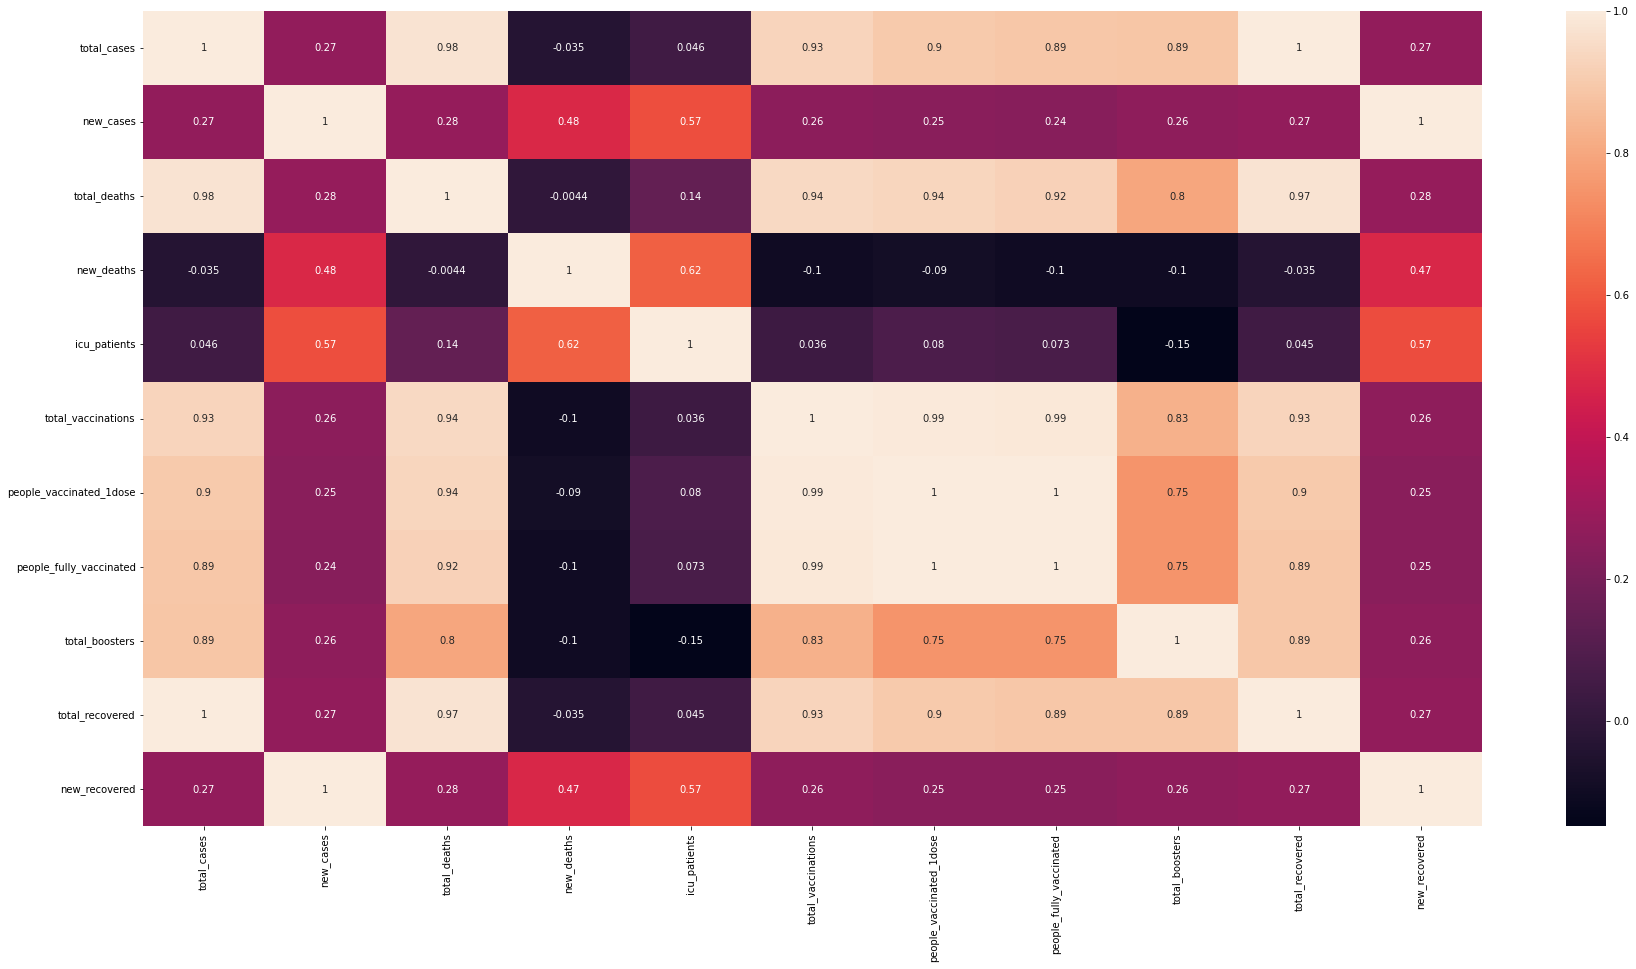

In [216]:
plt.figure(figsize=(30,15))
sns.heatmap(usa1.corr(),annot=True)
plt.show()

From the above correlation matrix we can infer that, people who are fully vaccinated and the total_recovered cases are highly correlated. Also, the vaccinations had a high correlation with the total deaths

# Hypothesis Testing

## T-Test

    H0: The mean afe of India is less than or equal to the mean age of all the countries
    H1: The mean age of India is greater than mean age of all the countries

In [203]:
from scipy import stats

In [243]:
np.mean(df['median_age'])

25.274632617482723

In [244]:
np.mean(dfaciu['median_age'])

35.764308855291574

In [245]:
np.mean(ind['median_age'])

28.0

In [239]:
ttest,p_value=stats.ttest_ind(df['median_age'],dfaciu['median_age'])
ttest,p_value

(-44.710708192342544, 0.0)

In [240]:
if p_value < 0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

We reject null hypothesis


In [241]:
ttest,p_value=stats.ttest_ind(df['median_age'],ind['median_age'])
ttest,p_value

(-5.79765580832456, 6.734504464556492e-09)

In [242]:
if p_value < 0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

We reject null hypothesis


# ANOVA Test

    H0: Avg age is same for all the countries
    H1: Avg age of atleast one country is different

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
new = ols('median_age~location',data = dfaciu).fit()

In [246]:
anova = sm.stats.anova_lm(new,type=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
location,3.0,7.451524e+04,2.483841e+04,3.928474e+29,0.0
Residual,3700.0,2.339385e-22,6.322662e-26,NaN,NaN


In [248]:
from scipy.stats import f_oneway

In [252]:
stat,p_value=f_oneway(chi['median_age'],ind['median_age'],usa['median_age'])
stat,p_value

(inf, 0.0)

In [253]:
if p_value < 0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

We reject null hypothesis


# Linear Regression

### Linear Regression between people who are fully vaccinated and new deaths occuring

In [254]:
x=df['people_fully_vaccinated'].values.reshape(-1,1)
y=df['new_deaths'].values.reshape(-1,1)

In [255]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [256]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [257]:
regressor.fit(x_train, y_train)

LinearRegression()

In [258]:
regressor.coef_

array([[1.09544246e-06]])

In [259]:
regressor.intercept_

array([100.43825091])

In [260]:
regressor.score(x,y)

0.1270874032306647

In [261]:
y_pred = regressor.predict(x_test)

In [262]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual   Predicted
0         0.0  100.438251
1         0.0  100.438251
2         0.0  100.438251
3         0.0  100.438251
4         0.0  100.438251
...       ...         ...
41410     0.0  100.438251
41411     0.0  100.438251
41412     0.0  100.544731
41413     2.0  100.438251
41414    17.0  100.438251

[41415 rows x 2 columns]


In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [264]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [265]:
mae

188.05118785538633

In [266]:
mse

406378.67177226255

In [267]:
rmse

637.4783696505024

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='new_deaths'>

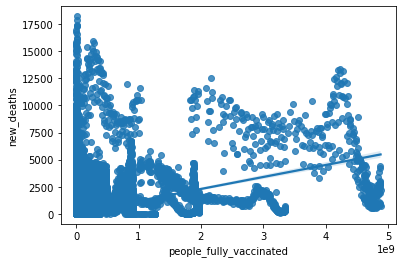

In [268]:
sns.regplot(x="people_fully_vaccinated",y="new_deaths",data=df)

In [269]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [270]:
#printig regression results
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [271]:
regression_results(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                 2.348e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        05:28:15   Log-Likelihood:            -1.3132e+06
No. Observations:              165658   AIC:                         2.626e+06
Df Residuals:                  165656   BIC:                         2.626e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.4383      1.658     60.573      0.0

### Regression results:
    rmse: 637.4783696505024
    Adj R2: 0.124

### Linear Regression between people who are fully vaccinated and new recovered cases

In [273]:
x=df['people_fully_vaccinated'].values.reshape(-1,1)
y=df['new_recovered'].values.reshape(-1,1)

In [274]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [275]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [276]:
regressor.fit(x_train, y_train)

LinearRegression()

In [277]:
regressor.coef_

array([[0.00021913]])

In [278]:
regressor.intercept_

array([6050.80898132])

In [279]:
regressor.score(x,y)

0.354476643116054

In [280]:
y_pred = regressor.predict(x_test)

In [281]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual     Predicted
0        133.0   6050.808981
1        605.0   6050.808981
2          1.0   6050.808981
3          0.0   6050.808981
4          0.0   6050.808981
...        ...           ...
41410      0.0   6050.808981
41411  44284.0  28119.612643
41412      0.0   6050.808981
41413   2138.0   6050.808981
41414   1248.0  41847.441501

[41415 rows x 2 columns]


In [282]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [283]:
mae

14793.973012560793

In [284]:
mse

4625805726.821157

In [285]:
rmse

68013.27610710396

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='new_recovered'>

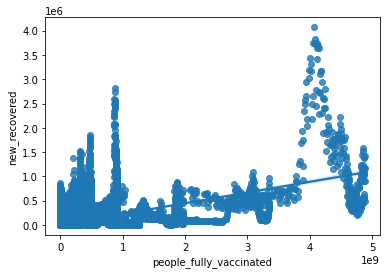

In [286]:
sns.regplot(x="people_fully_vaccinated",y="new_recovered",data=df)

In [287]:
#printig regression results
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [288]:
regression_results(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 9.130e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        05:36:17   Log-Likelihood:            -2.0793e+06
No. Observations:              165658   AIC:                         4.159e+06
Df Residuals:                  165656   BIC:                         4.159e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6050.8090    169.070     35.789      0.0

### Regression results:
    rmse: 68013.27610710396
    Adj R2: 0.355

# Regression results:
    rmse: 637.4783696505024
    Adj R2: 0.124
    
    On comparision, with respecct to adj r2, regression model 1 is preferred. whereas, with respect to rmse value, regression model 2 is preferred

# Multivariate Regression

In [289]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'icu_patients', 'total_vaccinations',
       'people_vaccinated_1dose', 'people_fully_vaccinated', 'total_boosters',
       'population', 'median_age', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'total_recovered', 'new_recovered'],
      dtype='object')

In [311]:
variables=['people_fully_vaccinated','total_boosters','female_smokers','male_smokers','diabetes_prevalence']

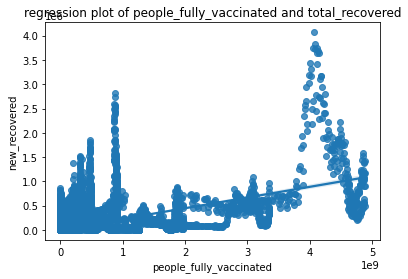

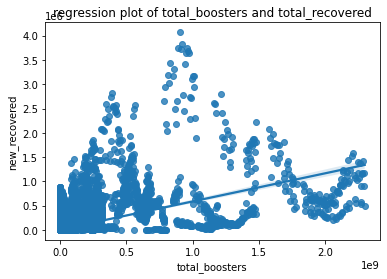

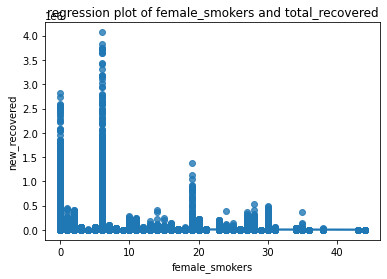

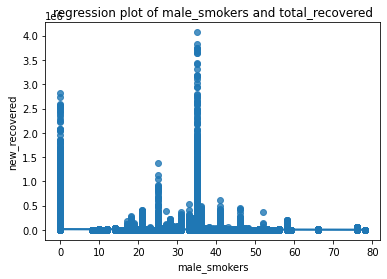

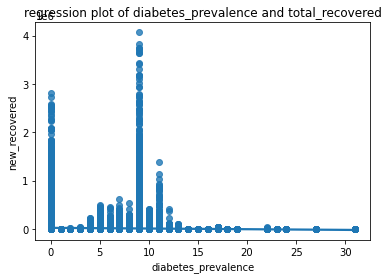

In [312]:
for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='new_recovered', data=df).set(title=f'regression plot of {var} and total_recovered')

In [313]:
y=df['new_recovered']
x=df[['people_fully_vaccinated','total_boosters','female_smokers','male_smokers','diabetes_prevalence']]

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [315]:
regressor.fit(x_train, y_train)

LinearRegression()

In [316]:
regressor.coef_

array([ 1.91659767e-04,  8.95481417e-05,  9.85644894e+01, -6.94840718e+01,
       -6.74901888e+02])

In [317]:
regressor.intercept_

11839.737184684547

In [318]:
feature_names = x.columns

In [319]:
feature_names

Index(['people_fully_vaccinated', 'total_boosters', 'female_smokers',
       'male_smokers', 'diabetes_prevalence'],
      dtype='object')

In [320]:
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
coefficients_df

,Coefficient value
people_fully_vaccinated,0.000192
total_boosters,0.000090
female_smokers,98.564489
male_smokers,-69.484072
diabetes_prevalence,-674.901888


In [321]:
y_pred = regressor.predict(x_test)

In [322]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
203412,0.0,11839.737185
168091,877.0,6742.012494
72054,37.0,11839.737185
180029,-4.0,9468.428617
23302,0.0,11839.737185
...,...,...
126772,66.0,3948.237082
21916,41.0,5090.718301
45976,39.0,3740.914524
98734,0.0,-4234.244866


In [323]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [324]:
mae

14945.976747979059

In [325]:
mse

4799266523.903238

In [326]:
rmse

69276.73869274765

In [327]:
regressor.score(x_test, y_test)

0.35490893772327226

In [328]:
regressor.score(x_train, y_train)

0.35912424187064795

In [329]:
#printig regression results
def regression_results(x,y):
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [330]:
regression_results(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:          new_recovered   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 1.857e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        05:46:50   Log-Likelihood:            -2.0779e+06
No. Observations:              165658   AIC:                         4.156e+06
Df Residuals:                  165652   BIC:                         4.156e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

# Time Series Forecasting

In [331]:
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import datetime

#importing statistical packages
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from pmdarima import model_selection
import pmdarima as pm

#from pmdarima import auto_arima

In [332]:
india = ind1[['date','new_cases']]
india.head()

,date,new_cases
85361,2020-01-30,1.0
85362,2020-01-31,0.0
85363,2020-01-02,0.0
85364,2020-02-02,1.0
85365,2020-03-02,1.0


In [333]:
def adftest(series):
    result=adfuller(series)
    print(result)
    print(f'ADF Statistic:{result[0]}')
    print(f'p-value:{result[1]}')
    if(result[1]>0.05):
        print("Series is not stationary")
    else:
        print("Series is stationary")

This is a function we have created to test for stationarity of a time series using the ADF test. ADF test is a unit root test where our null hypothesis is our series has a unit root,hence it is not stationary.So if we get an associated p value>0.05,that means that we accept the null hypothesis at 95% confidence level.Which means that we conclude that based on the evidence we have, our series is not stationary

In [334]:
adftest(india['new_cases'])

(-2.8961821430584864, 0.045793766968833576, 21, 899, {'1%': -3.4376448499903653, '5%': -2.8647603105890442, '10%': -2.568484710325773}, 18108.921689401523)
ADF Statistic:-2.8961821430584864
p-value:0.045793766968833576
Series is stationary


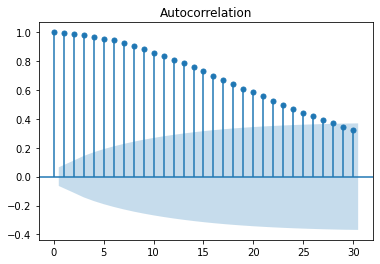

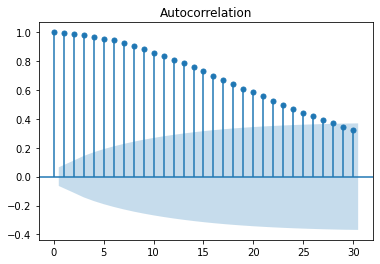

In [335]:
plot_acf(india['new_cases'])

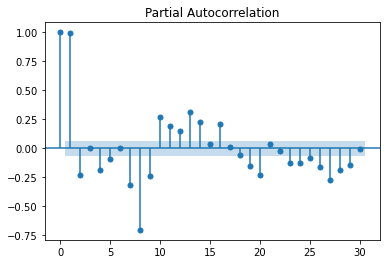

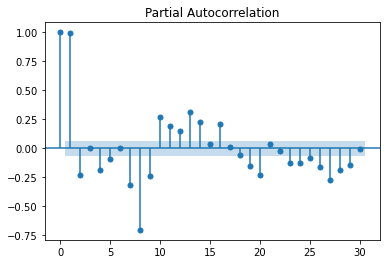

In [336]:
plot_pacf(india['new_cases'])

### From the above acf and pacf plots we see that lag 1 correlation and partial auto correlation are significant

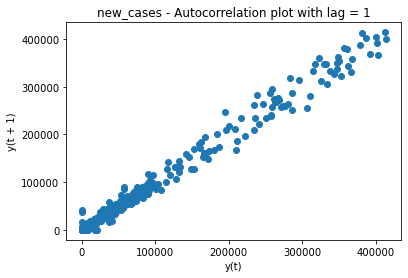

In [337]:
plt.figure()
lag_plot(india['new_cases'], lag=1)
plt.title('new_cases - Autocorrelation plot with lag = 1')
plt.show()

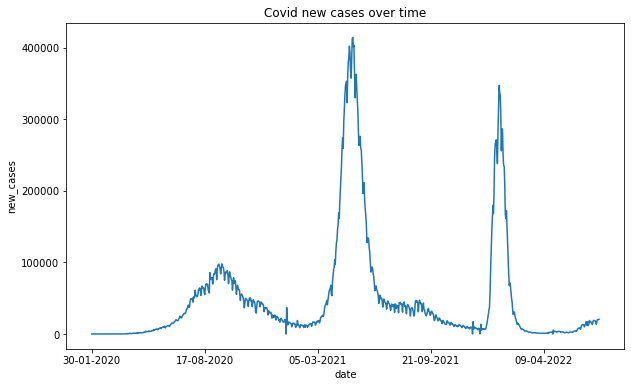

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(df["date"], df["new_cases"])
plt.xticks(np.arange(0,899, 200), df['date'][0:899:200])
plt.title("Covid new cases over time")
plt.xlabel("date")
plt.ylabel("new_cases")
plt.show()

In [150]:
train_data, test_data = df[0:700], df[700:]
train_data

,date,new_cases
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1
...,...,...
695,25-12-2021,6987
696,26-12-2021,6531
697,27-12-2021,6358
698,28-12-2021,9195


In [151]:
test_data

,date,new_cases
700,30-12-2021,16764
701,31-12-2021,22775
702,01-01-2022,27553
703,02-01-2022,33750
704,03-01-2022,37379
...,...,...
894,12-07-2022,16906
895,13-07-2022,20139
896,14-07-2022,20038
897,15-07-2022,20044


In [152]:
from pmdarima import auto_arima

In [153]:
training_data = train_data['new_cases'].values
auto_arima(train_data['new_cases'].values)

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [154]:
test_data = test_data['new_cases'].values

In [155]:
#training_data = train_data['MARUTI'].values
#test_data = test_data[[:1]].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

C:\Users\lhare\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lhare\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [156]:
MSE = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE))

Testing Mean Squared Error is 79660211.45558447


In [157]:
y =np.sqrt(MSE)  # RMSE 
y

8925.256940591933

In [158]:
x = np.mean(test_data)
x

44867.13065326633

In [159]:
z = (y/x)*100
z

19.892640359746682

In [160]:
print("Mean Squared Error (MSE):", mean_squared_error(test_data, model_predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(test_data, model_predictions))

Mean Squared Error (MSE): 79660211.45558447
Mean Absolute Error (MAE): 4106.698780268204


In [161]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(test_data, model_predictions))

Mean Absolute % Error (MAPE):  3231.8748317166096


In [162]:
test_set_range = df[700:].index
test_set_range

RangeIndex(start=700, stop=899, step=1)

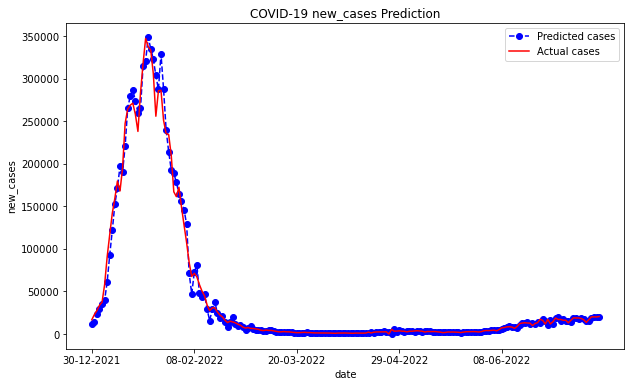

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted cases')
plt.plot(test_set_range, test_data, color='red', label='Actual cases')
plt.title('COVID-19 new_cases Prediction')
plt.xlabel('date')
plt.ylabel('new_cases')
plt.xticks(np.arange(700, 899, 40), df.date[700:899:40])
plt.legend()

# Time series forecasting using Linear Regression

In [164]:
df=pd.read_csv(r"G:\My Drive\Data Science\projects\term 2 MSE project\India_COVID_Dataset.csv")

In [165]:
df=df[['date','new_cases']]
df

,date,new_cases
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1
...,...,...
894,12-07-2022,16906
895,13-07-2022,20139
896,14-07-2022,20038
897,15-07-2022,20044


In [166]:
df['cases_prevday']=df['new_cases'].shift(+1)
df['cases_2daysago']=df['new_cases'].shift(+2)
df['cases_3daysago']=df['new_cases'].shift(+3)
df

,date,new_cases,cases_prevday,cases_2daysago,cases_3daysago
0,30-01-2020,1,NaN,NaN,NaN
1,31-01-2020,0,1.0,NaN,NaN
2,01-02-2020,0,0.0,1.0,NaN
3,02-02-2020,1,0.0,0.0,1.0
4,03-02-2020,1,1.0,0.0,0.0
...,...,...,...,...,...
894,12-07-2022,16906,13615.0,16678.0,18257.0
895,13-07-2022,20139,16906.0,13615.0,16678.0
896,14-07-2022,20038,20139.0,16906.0,13615.0
897,15-07-2022,20044,20038.0,20139.0,16906.0


In [167]:
df=df.dropna()
df

,date,new_cases,cases_prevday,cases_2daysago,cases_3daysago
3,02-02-2020,1,0.0,0.0,1.0
4,03-02-2020,1,1.0,0.0,0.0
5,04-02-2020,0,1.0,1.0,0.0
6,05-02-2020,0,0.0,1.0,1.0
7,06-02-2020,0,0.0,0.0,1.0
...,...,...,...,...,...
894,12-07-2022,16906,13615.0,16678.0,18257.0
895,13-07-2022,20139,16906.0,13615.0,16678.0
896,14-07-2022,20038,20139.0,16906.0,13615.0
897,15-07-2022,20044,20038.0,20139.0,16906.0


In [168]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()

In [169]:
import numpy as np
x1,x2,x3,y=df['cases_prevday'],df['cases_2daysago'],df['cases_3daysago'],df['new_cases']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [2.0139e+04 1.6906e+04 1.3615e+04]
 [2.0038e+04 2.0139e+04 1.6906e+04]
 [2.0044e+04 2.0038e+04 2.0139e+04]]


In [170]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [171]:
lrm.fit(X_train,y_train)

LinearRegression()

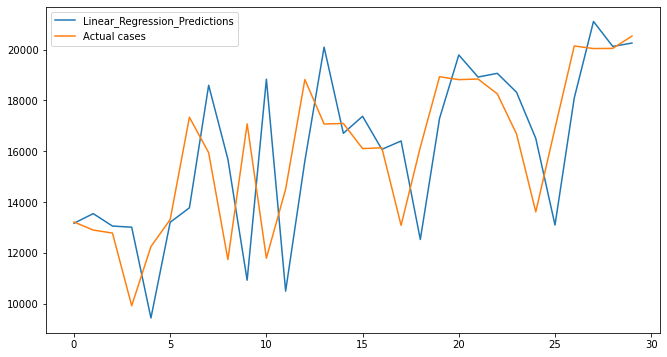

In [172]:
lin_pred=lrm.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual cases')
plt.legend(loc="upper left")
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [174]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 2811.6198071918448


# Future prediction using Prophet

In [175]:
import prophet as fbp

In [176]:
df.head()

,date,new_cases,cases_prevday,cases_2daysago,cases_3daysago
3,02-02-2020,1,0.0,0.0,1.0
4,03-02-2020,1,1.0,0.0,0.0
5,04-02-2020,0,1.0,1.0,0.0
6,05-02-2020,0,0.0,1.0,1.0
7,06-02-2020,0,0.0,0.0,1.0


In [177]:
len(df)

896

In [178]:
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"date":"ds","new_cases":"y"}) #renaming the columns of the dataset
df

,ds,y,cases_prevday,cases_2daysago,cases_3daysago
3,02-02-2020,1,0.0,0.0,1.0
4,03-02-2020,1,1.0,0.0,0.0
5,04-02-2020,0,1.0,1.0,0.0
6,05-02-2020,0,0.0,1.0,1.0
7,06-02-2020,0,0.0,0.0,1.0
...,...,...,...,...,...
894,12-07-2022,16906,13615.0,16678.0,18257.0
895,13-07-2022,20139,16906.0,13615.0,16678.0
896,14-07-2022,20038,20139.0,16906.0,13615.0
897,15-07-2022,20044,20038.0,20139.0,16906.0


In [179]:
df_train = df.loc[:700]
df_test = df.loc[701:]

In [180]:
len(df_train)

698

In [181]:
len(df_test)

198

In [182]:
# Instantiate prophet
model = fbp.Prophet(daily_seasonality=False)
# fit the training data
model.fit(df_train)

14:57:04 - cmdstanpy - INFO - Chain [1] start processing
14:57:05 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
future = model.make_future_dataframe(periods=300) #we need to specify the number of days in future
future.tail()

,ds
993,2022-10-22
994,2022-10-23
995,2022-10-24
996,2022-10-25
997,2022-10-26


In [184]:
future

,ds
0,2020-01-03
1,2020-01-04
2,2020-01-05
3,2020-01-06
4,2020-01-07
...,...
993,2022-10-22
994,2022-10-23
995,2022-10-24
996,2022-10-25


In [185]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
993,2022-10-22,-64041.422007,-154623.156419,24126.590386
994,2022-10-23,-64381.945107,-158490.605939,24165.335457
995,2022-10-24,-66963.688611,-154292.107699,28784.887839
996,2022-10-25,-64431.880882,-152884.649697,31038.245437
997,2022-10-26,-64719.058558,-154027.463103,27914.887414


In [186]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-03,2449.704626,-78914.654774,91202.009357
1,2020-01-04,-4224.169370,-93747.399042,82480.994516
2,2020-01-05,-4080.343413,-88736.385393,94619.236172
3,2020-01-06,-6177.737861,-98034.345987,80314.125005
4,2020-01-07,-3161.581074,-89190.209183,82290.497511


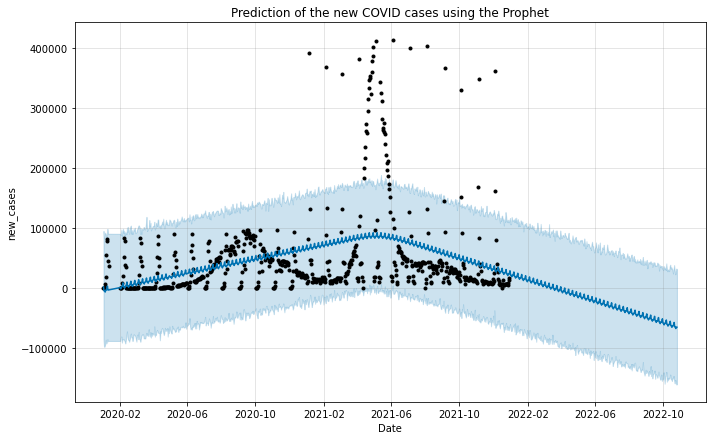

In [187]:
forecast = model.predict(future)
model.plot(forecast)
plt.title("Prediction of the new COVID cases using the Prophet")
plt.xlabel("Date")
plt.ylabel("new_cases")
plt.show()

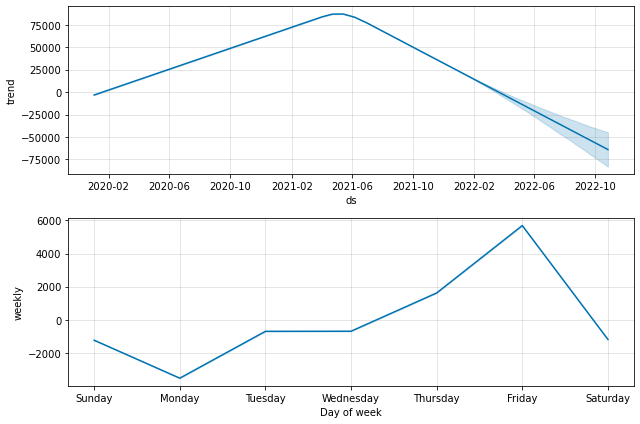

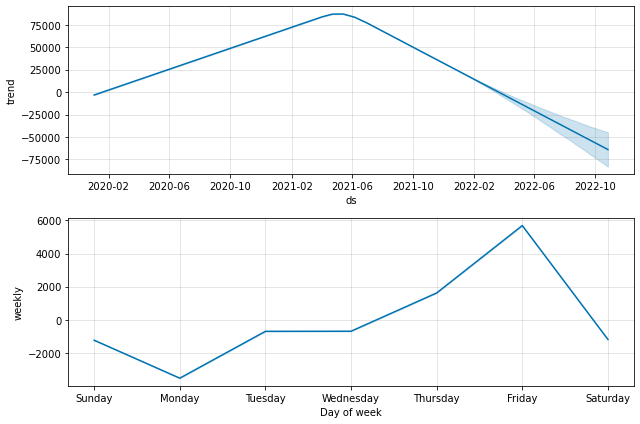

In [188]:
model.plot_components(forecast)

In [189]:
len(forecast)

998

In [190]:
df_test["y"]

701    22775
702    27553
703    33750
704    37379
705    58097
       ...  
894    16906
895    20139
896    20038
897    20044
898    20528
Name: y, Length: 198, dtype: int64

In [191]:
f=forecast['yhat'][701:]
f

701    19160.024087
702    21691.831816
703    21404.654140
704    23419.461976
705    27189.949156
           ...     
993   -64041.422007
994   -64381.945107
995   -66963.688611
996   -64431.880882
997   -64719.058558
Name: yhat, Length: 297, dtype: float64

Text(0, 0.5, 'new_cases')

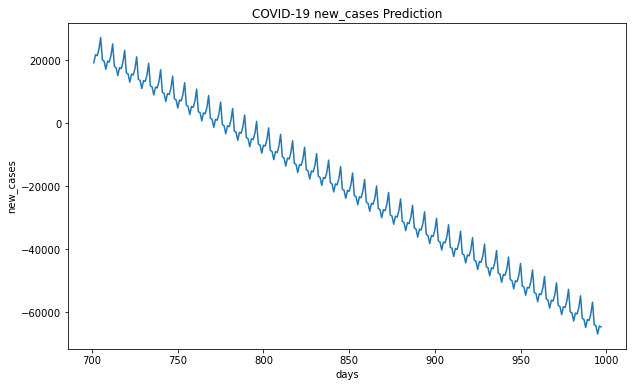

In [192]:
plt.figure(figsize=(10, 6))
plt.plot(f)
plt.title('COVID-19 new_cases Prediction')
plt.xlabel('days')
plt.ylabel('new_cases')